# Bibliotecas necessárias

In [2]:
import numpy as np  # Biblioteca para manipulação numérica eficiente
import pandas as pd  # Biblioteca para manipulação de dados em formato de DataFrame
import matplotlib.pyplot as plt  # Biblioteca para visualização de dados
from sklearn.decomposition import PCA  # Importando a classe PCA (Análise de Componentes Principais) do scikit-learn
from sklearn.cluster import KMeans  # Importando a classe KMeans do scikit-learn para realizar clusterização K-Means
from sklearn.preprocessing import StandardScaler  # Importando a classe StandardScaler do scikit-learn para padronização de dados
from sklearn.cluster import AgglomerativeClustering  # Importando a classe AgglomerativeClustering do scikit-learn para realizar clustering aglomerativo
from tqdm import tqdm_notebook as tqdm  # Importa a função tqdm_notebook do módulo tqdm para exibir barras de progresso em Jupyter Notebook
import seaborn as sns  # Importa a biblioteca seaborn para visualização de dados estatísticos
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from googlesearch import search
from googletrans import Translator
import requests
import os
from sklearn.metrics import silhouette_score, davies_bouldin_score
#from googletrans import Translator
#from rpy2.robjects import pandas2ri
from transformers import BertTokenizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

pip install google (Já instalado)

pip install googletrans==4.0.0-rc1 (Já instalado)

pip install rpy2 (Já instalado) 

pip install torch torchvision torchaudio (já instalado) 

pip install tqdm (Já instalado)

pip install --user --upgrade scikit-learn

pip install --upgrade scikit-learn

pip install xgboost

# Importação dos dados 

In [3]:
# Importação dos dados
srag_tratado = pd.read_csv("srag_tratada.csv", low_memory = False)
dados = srag_tratado.copy().drop("ID", axis = 1)
print("Visualizando os primeiros registros dos dados:")
print(dados.head()) 

Visualizando os primeiros registros dos dados:
   CS_SEXO  NU_IDADE_N  CARDIOPATI_m  HEMATOLOGI_m  SIND_DOWN_m  HEPATICA_m  \
0        1    0.373737             0             0            0           0   
1        0    0.414141             0             0            0           0   
2        0    0.727273             1             0            0           0   
3        1    0.404040             0             0            0           0   
4        0    0.343434             1             0            0           0   

   ASMA_m  DIABETES_m  NEUROLOGIC_m  PNEUMOPATI_m  ...  IS_CAPITAL  UTI  \
0       0           0             0             0  ...           1    0   
1       0           0             0             0  ...           1    0   
2       0           0             1             0  ...           1    0   
3       0           1             0             0  ...           1    1   
4       0           0             0             0  ...           1    1   

   IS_DEATH  White  Black/B

In [4]:
srag_tratado.columns 

Index(['ID', 'CS_SEXO', 'NU_IDADE_N', 'CARDIOPATI_m', 'HEMATOLOGI_m',
       'SIND_DOWN_m', 'HEPATICA_m', 'ASMA_m', 'DIABETES_m', 'NEUROLOGIC_m',
       'PNEUMOPATI_m', 'IMUNODEPRE_m', 'RENAL_m', 'OBESIDADE_m', 'IS_CAPITAL',
       'UTI', 'IS_DEATH', 'White', 'Black/Brown', 'Asian', 'Indigenous',
       'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun'],
      dtype='object')

# Caso simples 

Sem o uso de semântica

# PCA (Caso simples)

PCA é uma técnica de redução de dimensionalidade que identifica os principais padrões nos dados, representando-os em um espaço de dimensão reduzida. Ele permite simplificar a interpretação dos dados e preservar as informações essenciais.


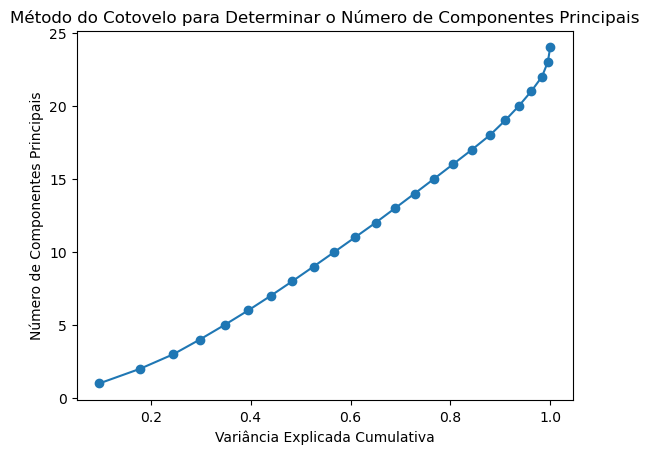

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supondo que você já tenha carregado seus dados e os armazenou em 'dados_dose_definitivo_01'

# Normalizando os dados (opcional, mas geralmente uma boa prática)
dados_norm = (srag_tratado - srag_tratado.mean()) / srag_tratado.std()

# Inicializando o objeto PCA sem especificar o número de componentes principais
pca = PCA()

# Aplicando a transformação PCA aos dados normalizados
pca.fit(dados_norm)

# Calcular a variância explicada cumulativa
var_exp_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plotar a variância explicada cumulativa em relação ao número de componentes, invertendo os eixos
plt.plot(var_exp_cumulative, range(1, len(var_exp_cumulative) + 1), marker='o')
plt.ylabel('Número de Componentes Principais')
plt.xlabel('Variância Explicada Cumulativa')
plt.title('Método do Cotovelo para Determinar o Número de Componentes Principais')
plt.show()

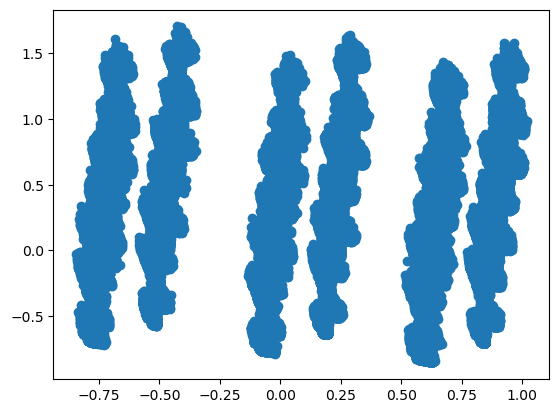

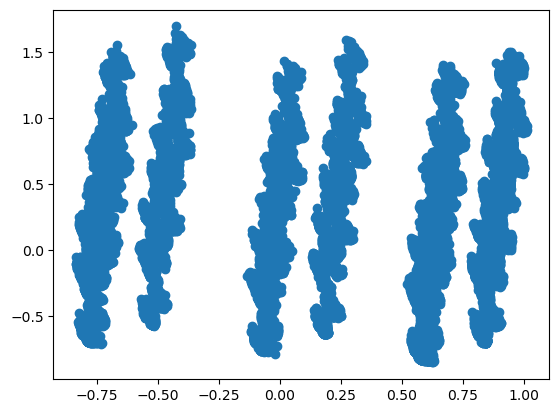

In [6]:
# Inicializando o objeto PCA com o número de componentes principais desejados = 2
pca = PCA(n_components=2)

# Aplicando a transformação PCA aos dados e armazenando o resultado em um DataFrame chamado dados_reduced
dados_reduced = pd.DataFrame(pca.fit_transform(dados))

# Verificando a forma (shape) dos dados originais
dados.shape

# Verificando a forma (shape) dos dados reduzidos após a aplicação do PCA
dados_reduced.shape

# Plotando um gráfico de dispersão dos dados reduzidos (apenas duas dimensões)
plt.scatter(dados_reduced[0], dados_reduced[1])

# Mostrando o gráfico
plt.show()

# Amostrando os dados reduzidos para 75000 instâncias, garantindo que a amostra seja a mesma para diferentes execuções (random_state=42)
dados_reduced_sample = dados_reduced.sample(75000, random_state=42)

# Plotando um gráfico de dispersão dos dados reduzidos amostrados
plt.scatter(dados_reduced_sample[0], dados_reduced_sample[1])

# Mostrando o gráfico
plt.show()

In [7]:
dados_reduced 

0         1
0        0.180253 -0.592342
1        0.160373 -0.535167
2       -0.509394  0.591999
3       -0.414876  0.932765
4       -0.470223  1.166148
...           ...       ...
1671974  0.267653  0.997964
1671975 -0.516982  0.244740
1671976 -0.770558 -0.472479
1671977 -0.739486 -0.558375
1671978 -0.535362 -0.098369

[1671979 rows x 2 columns]

# Técnicas para a formação de Clustering 



### KMeans

Um algoritmo de clustering que divide os dados em k clusters, onde cada observação pertence ao cluster com o centróide mais próximo.

### Gaussian Mixture Models (GMM):

Um modelo probabilístico que assume que os dados foram gerados a partir de uma mistura de várias distribuições gaussianas.

### Índice de Silhueta

O valor de silhueta é uma medida de quão similar um objeto é ao seu próprio cluster em comparação com outros clusters 

### BIC

   O método de BIC (Critério de Informação Bayesiano) é útil para modelos de Gaussian Mixture porque considera tanto o ajuste aos dados quanto a complexidade do modelo. Ele favorece modelos mais simples que ainda se ajustam bem aos dados, ajudando na escolha do número ideal de componentes gaussianos para uma melhor interpretação e generalização dos clusters.
   


In [10]:
def generate_clusters(data, n_clusters, method='kmeans'):
    if method == 'kmeans':
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=75000)
        kmeans.fit(data)
        labels = kmeans.labels_
    elif method == 'gmm':
        gmm = GaussianMixture(n_components=n_clusters, random_state=75000)
        gmm.fit(data)
        labels = gmm.predict(data)
    else:
        raise ValueError("Invalid method. Use 'kmeans' or 'gmm'.")
    return labels

In [11]:
def evaluate_clustering_methods(data, min_clusters=4, max_clusters=15):
    performance_results = []
    cluster_labels = {}
    cluster_labels_arr = []  # Lista para armazenar os rótulos dos clusters como arrays
    
    total_iterations = (max_clusters - min_clusters + 1)
    pbar = tqdm(total=total_iterations)
    
    for n_clusters in range(min_clusters, max_clusters + 1):
        pbar.set_description(f'Progress: Clusters = {n_clusters}')
        print("Evaluating with", n_clusters, "clusters")
        
        # KMeans
        print("Calculating KMeans")
        kmeans_labels = generate_clusters(data, n_clusters, method='kmeans')
        cluster_labels[f'KMeans_{n_clusters}'] = kmeans_labels
        cluster_labels_arr.append(kmeans_labels)  # Adiciona o array de rótulos
        
        print("Calculating KMeans BIC")  # Corrigido de 'inertia' para 'bic'
        kmeans_bic = KMeans(n_clusters=n_clusters, n_init=10, random_state=75000).fit(data).inertia_
        kmeans_dbi = davies_bouldin_score(data, kmeans_labels)
        
        # GMM
        print("Calculating GMM")
        gmm_labels = generate_clusters(data, n_clusters, method='gmm')
        cluster_labels[f'GMM_{n_clusters}'] = gmm_labels
        cluster_labels_arr.append(gmm_labels)  # Adiciona o array de rótulos
        
        print("Calculating GMM BIC")
        gmm_bic = GaussianMixture(n_components=n_clusters, random_state=75000).fit(data).bic(data)
        gmm_dbi = davies_bouldin_score(data, gmm_labels)
        
        performance_results.append({
            'Number of Clusters': n_clusters,
            'KMeans (BIC)': kmeans_bic,
            'KMeans (DBI)': kmeans_dbi,
            'GMM (BIC)': gmm_bic,
            'GMM (DBI)': gmm_dbi
        })
        
        pbar.update(1)
    
    pbar.close()

    performance_df = pd.DataFrame(performance_results)
    return performance_df, cluster_labels, cluster_labels_arr

In [12]:
resultado_em_tupla_inicial = evaluate_clustering_methods(dados_reduced)


Progress: Clusters = 4:   0%|                                                                   | 0/12 [00:00<?, ?it/s]

Evaluating with 4 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 5:   8%|████▊                                                     | 1/12 [01:47<19:46, 107.88s/it]

Evaluating with 5 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 6:  17%|█████████▋                                                | 2/12 [04:03<20:43, 124.33s/it]

Evaluating with 6 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 7:  25%|██████████████▌                                           | 3/12 [06:39<20:48, 138.73s/it]

Evaluating with 7 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 8:  33%|███████████████████▎                                      | 4/12 [07:37<14:15, 106.91s/it]

Evaluating with 8 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 9:  42%|████████████████████████▏                                 | 5/12 [11:21<17:23, 149.08s/it]

Evaluating with 9 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 10:  50%|████████████████████████████▌                            | 6/12 [12:45<12:42, 127.05s/it]

Evaluating with 10 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 11:  58%|█████████████████████████████████▎                       | 7/12 [14:33<10:02, 120.56s/it]

Evaluating with 11 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 12:  67%|██████████████████████████████████████                   | 8/12 [15:52<07:10, 107.50s/it]

Evaluating with 12 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 13:  75%|███████████████████████████████████████████▌              | 9/12 [17:10<04:54, 98.21s/it]

Evaluating with 13 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 14:  83%|██████████████████████████████████████████████▋         | 10/12 [18:58<03:22, 101.38s/it]

Evaluating with 14 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 15:  92%|███████████████████████████████████████████████████▎    | 11/12 [20:55<01:46, 106.08s/it]

Evaluating with 15 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 15: 100%|████████████████████████████████████████████████████████| 12/12 [23:44<00:00, 118.72s/it]


In [13]:
Data_Frame_avaliacao_inicial = resultado_em_tupla_inicial[0]
clusterings_rotulo_inicial = resultado_em_tupla_inicial[1]

In [14]:
Data_Frame_avaliacao_inicial 

Number of Clusters   KMeans (BIC)  KMeans (DBI)     GMM (BIC)  GMM (DBI)
0                    4  259543.273302      0.692077  3.269035e+06   1.870513
1                    5  205633.102373      0.793151  2.845765e+06   1.810600
2                    6  166285.018807      0.740521  2.474272e+06   1.566484
3                    7  131260.325578      0.700850  3.545333e+06   0.841250
4                    8  106529.149331      0.654006  2.215396e+06   1.346272
5                    9   89542.495906      0.676777  2.869895e+06   0.698792
6                   10   74298.644656      0.682894  2.840250e+06   0.702767
7                   11   61426.171013      0.640900  2.769881e+06   0.655876
8                   12   55618.842925      0.635921  2.758721e+06   0.652578
9                   13   51640.682491      0.653757  2.306114e+06   0.629789
10                  14   48069.547606      0.676401  1.739907e+06   0.610441
11                  15   43657.254475      0.696384  1.446224e+06   0.677510

In [15]:
clusterings_rotulo_inicial 

{'KMeans_4': array([1, 1, 2, ..., 0, 0, 0]),
 'GMM_4': array([2, 2, 3, ..., 0, 0, 3], dtype=int64),
 'KMeans_5': array([4, 4, 3, ..., 0, 0, 0]),
 'GMM_5': array([4, 4, 3, ..., 0, 0, 3], dtype=int64),
 'KMeans_6': array([0, 0, 1, ..., 5, 5, 4]),
 'GMM_6': array([4, 4, 3, ..., 0, 0, 3], dtype=int64),
 'KMeans_7': array([5, 5, 0, ..., 2, 2, 4]),
 'GMM_7': array([4, 4, 3, ..., 0, 0, 0], dtype=int64),
 'KMeans_8': array([6, 6, 3, ..., 4, 4, 1]),
 'GMM_8': array([5, 5, 3, ..., 0, 0, 3], dtype=int64),
 'KMeans_9': array([5, 5, 8, ..., 0, 0, 3]),
 'GMM_9': array([5, 5, 8, ..., 0, 0, 3], dtype=int64),
 'KMeans_10': array([9, 9, 1, ..., 4, 4, 6]),
 'GMM_10': array([5, 5, 3, ..., 0, 0, 9], dtype=int64),
 'KMeans_11': array([7, 7, 2, ..., 0, 0, 4]),
 'GMM_11': array([5, 5, 3, ..., 0, 0, 9], dtype=int64),
 'KMeans_12': array([8, 8, 2, ..., 1, 1, 7]),
 'GMM_12': array([5, 5, 3, ..., 0, 0, 9], dtype=int64),
 'KMeans_13': array([1, 1, 3, ..., 2, 2, 8]),
 'GMM_13': array([5, 5, 3, ..., 0, 0, 9], dtype=

In [16]:
def plot_kmeans_scatter(data, cluster_labels, n_clusters):
    palette = sns.color_palette('hls', n_clusters)
    plt.figure()
    for cluster in range(n_clusters):
        cluster_data = data[cluster_labels == cluster]
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], color=palette[cluster], label=f'Cluster {cluster}')
    plt.title(f'KMeans - {n_clusters} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def plot_gmm_scatter(data, cluster_labels, n_clusters):
    plt.figure()
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.title(f'GMM - {n_clusters} Components')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

def plot_clusters(clusterings, data):
    for key, cluster_labels in clusterings.items():
        method, n_clusters = key.split('_')
        n_clusters = int(n_clusters)
        if method.startswith('KMeans'):
            plot_kmeans_scatter(data, cluster_labels, n_clusters)
        elif method.startswith('GMM'):
            plot_gmm_scatter(data, cluster_labels, n_clusters)


C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


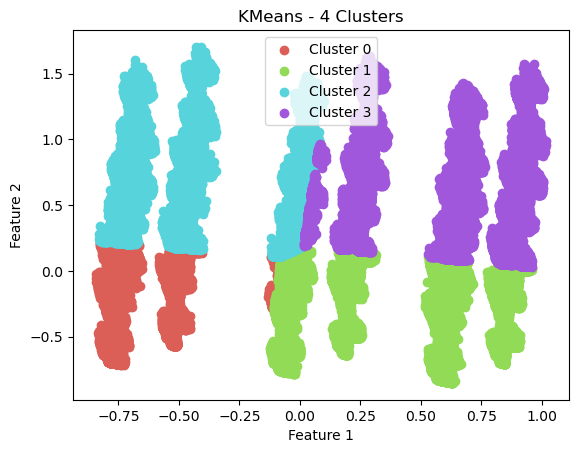

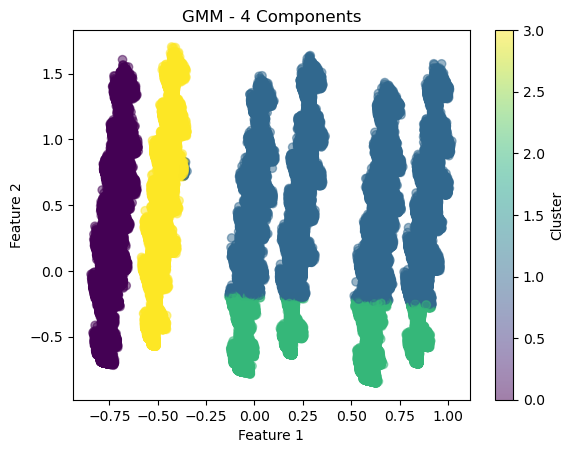

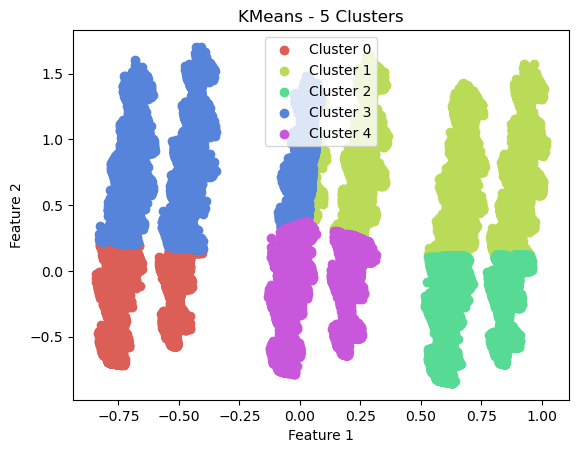

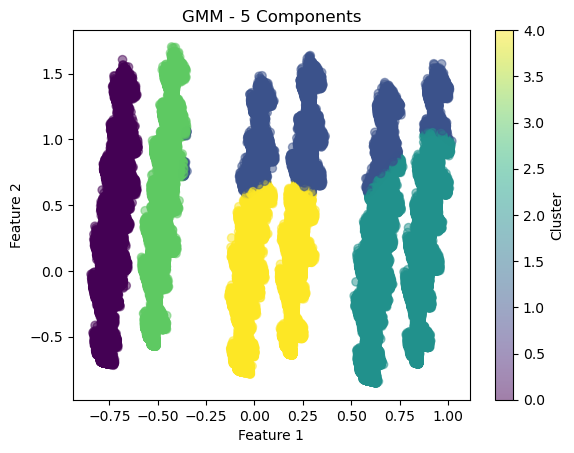

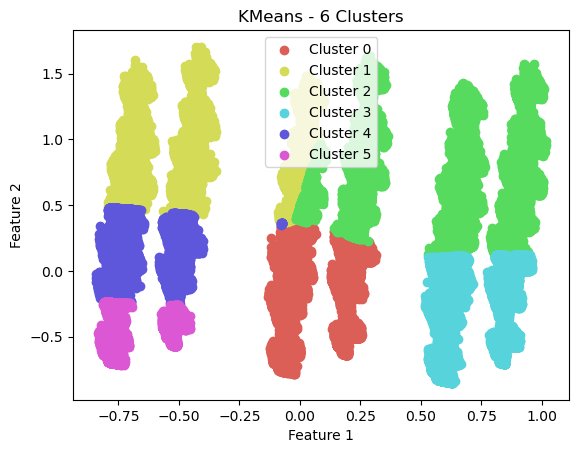

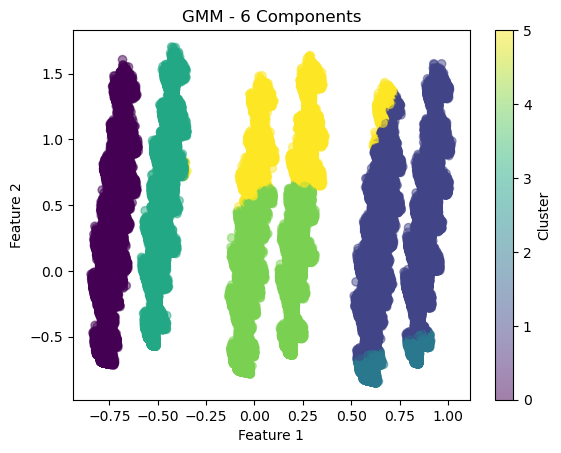

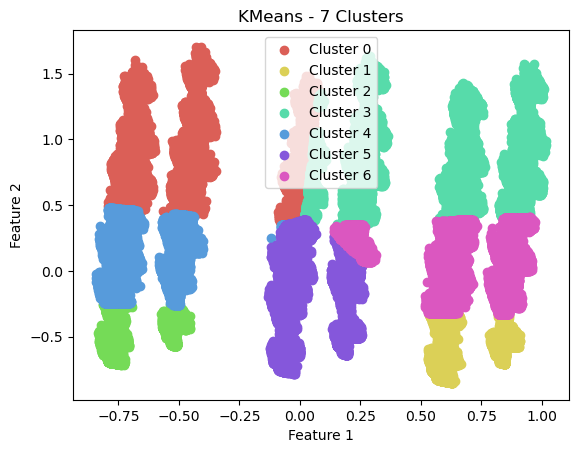

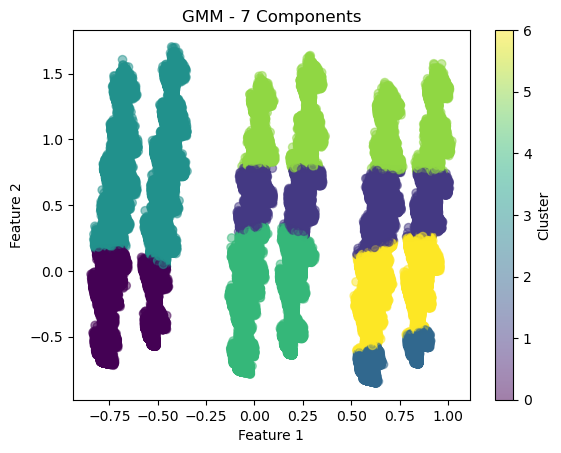

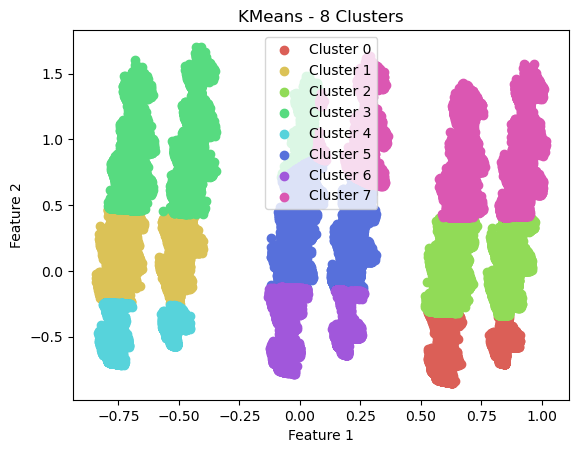

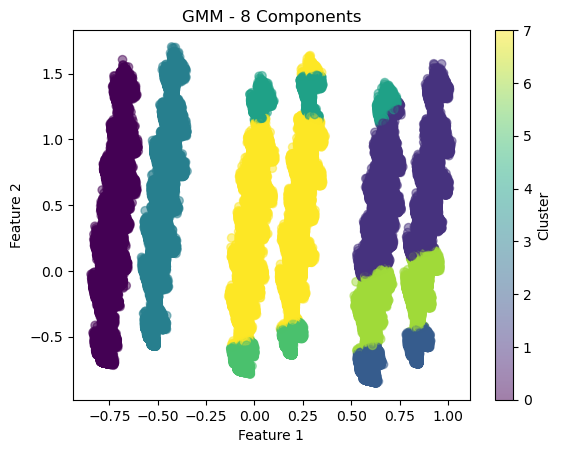

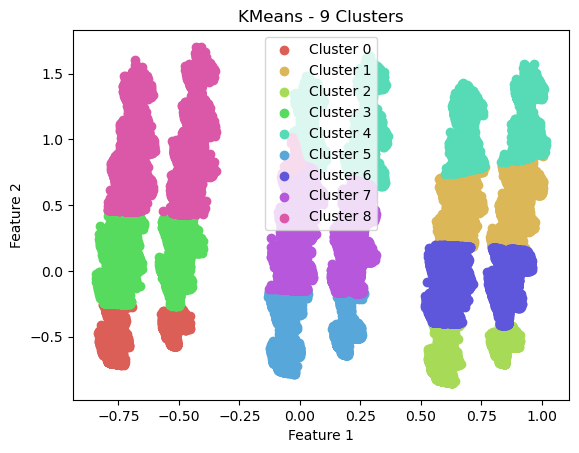

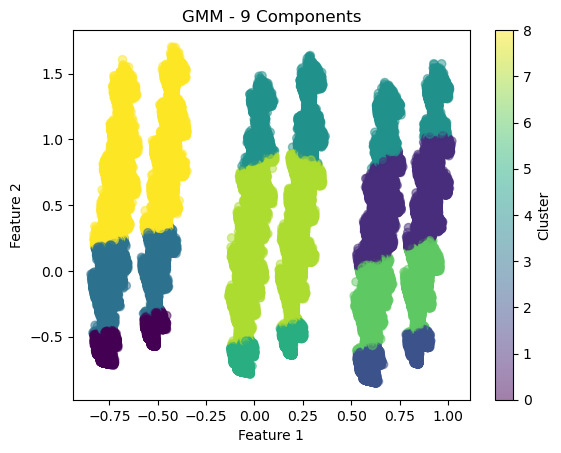

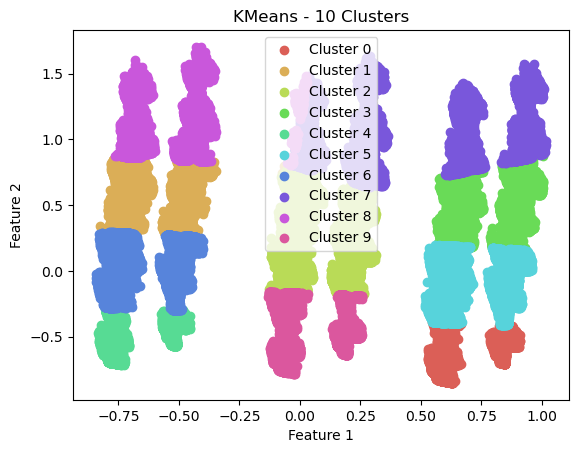

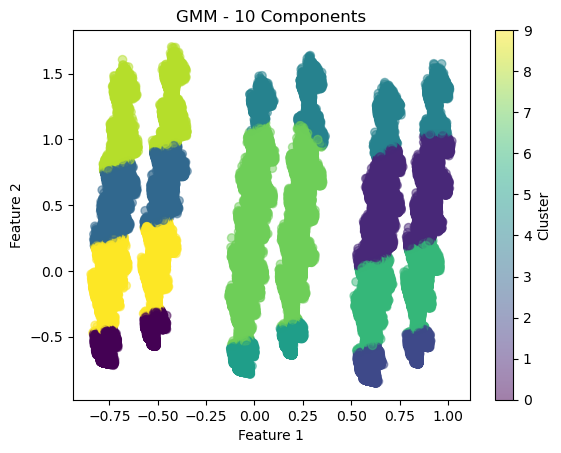

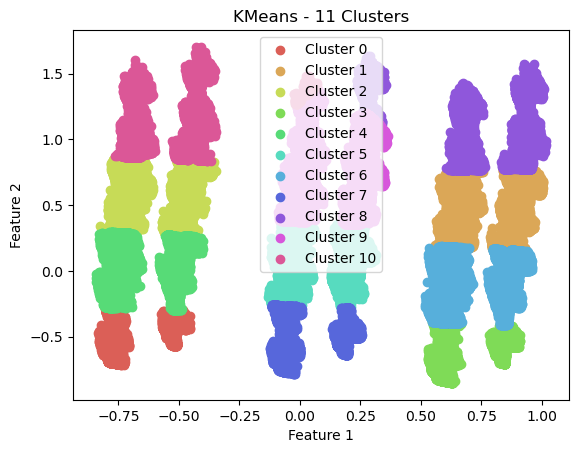

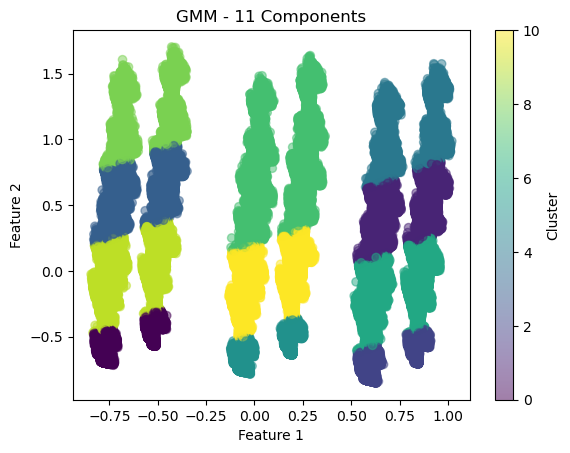

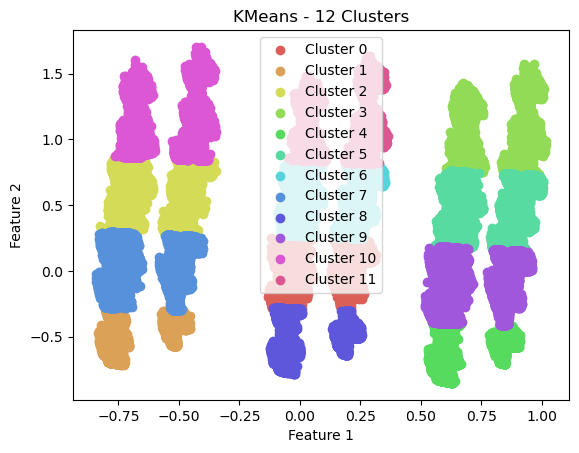

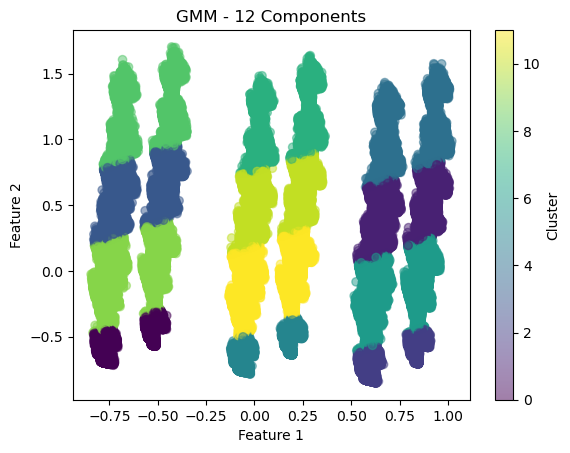

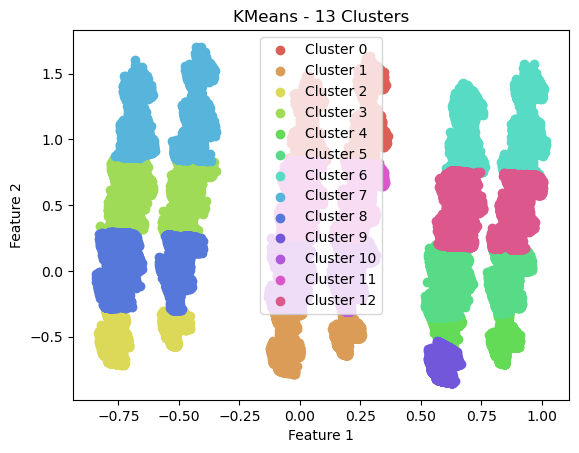

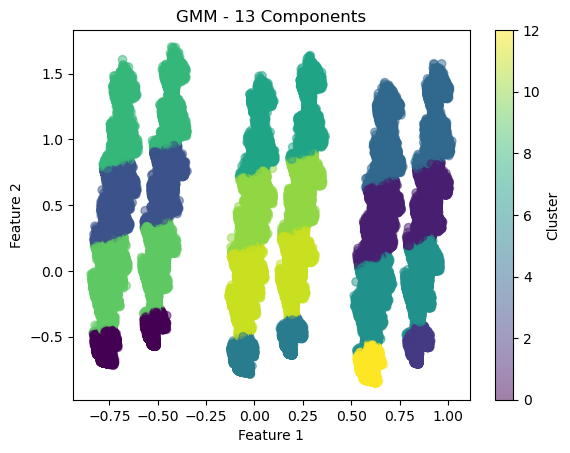

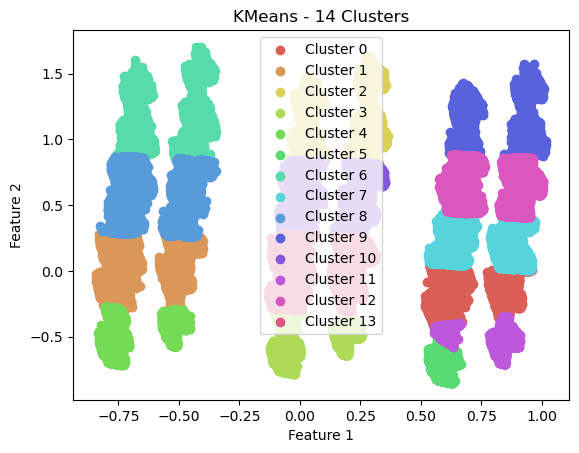

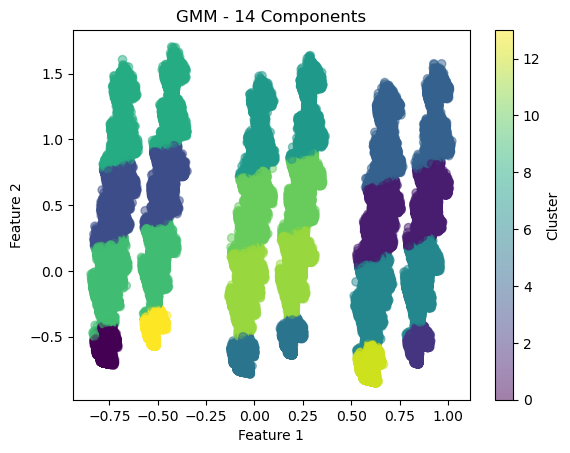

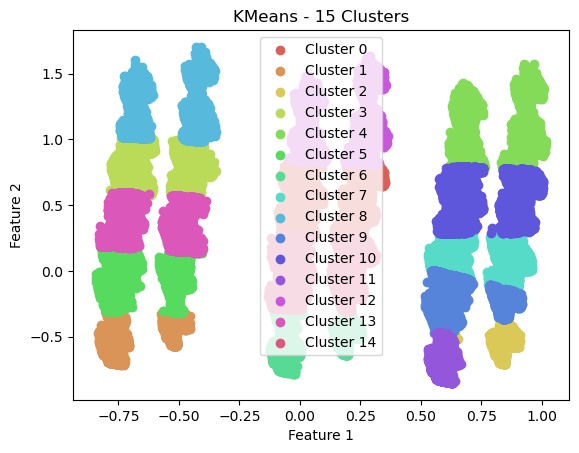

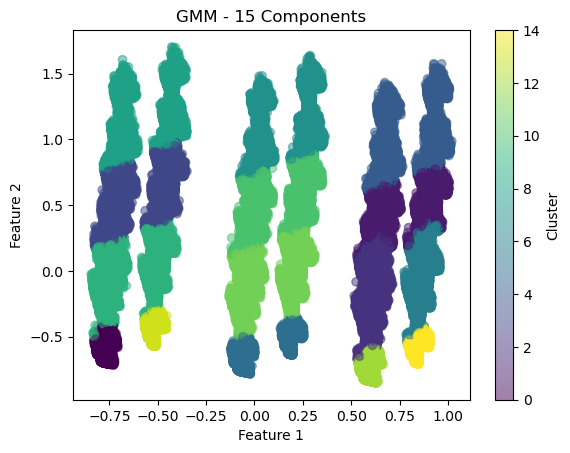

In [17]:
plot_clusters(clusterings_rotulo_inicial ,dados_reduced)

## Confeccionando gráficos dos resultados 

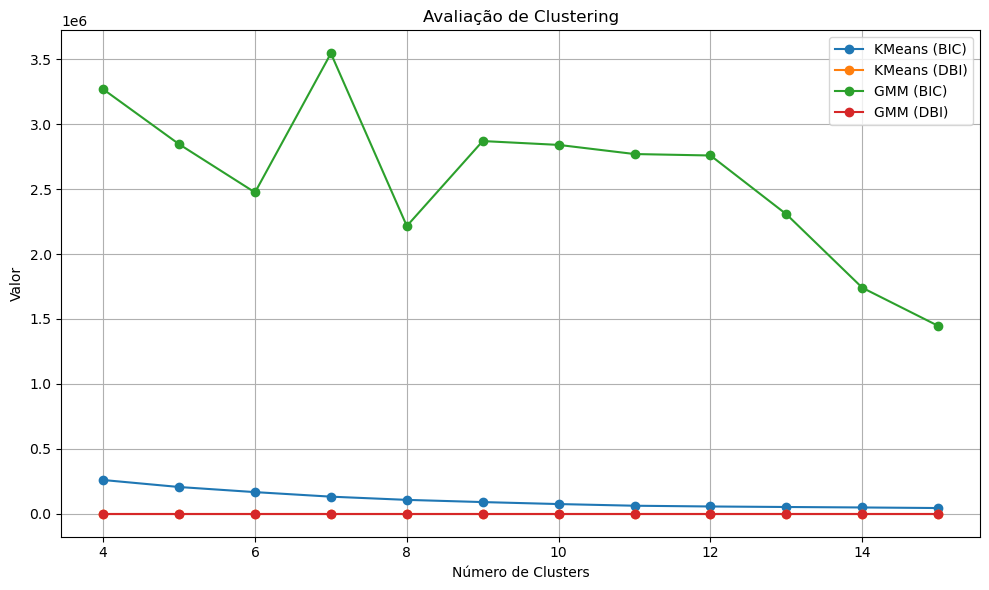

In [18]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotando os dados
plt.plot(Data_Frame_avaliacao_inicial['Number of Clusters'], Data_Frame_avaliacao_inicial['KMeans (BIC)'], marker='o', label='KMeans (BIC)')
plt.plot(Data_Frame_avaliacao_inicial['Number of Clusters'], Data_Frame_avaliacao_inicial['KMeans (DBI)'], marker='o', label='KMeans (DBI)')
plt.plot(Data_Frame_avaliacao_inicial['Number of Clusters'], Data_Frame_avaliacao_inicial['GMM (BIC)'], marker='o', label='GMM (BIC)')
plt.plot(Data_Frame_avaliacao_inicial['Number of Clusters'], Data_Frame_avaliacao_inicial['GMM (DBI)'], marker='o', label='GMM (DBI)')

# Adicionando título e rótulos dos eixos
plt.title('Avaliação de Clustering')
plt.xlabel('Número de Clusters')
plt.ylabel('Valor')
plt.legend()

# Mostrando o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicação da semantica na análise de clustering 


## Observação do mapa de calor 

Text(95.72222222222221, 0.5, 'Termos da Ontologia')

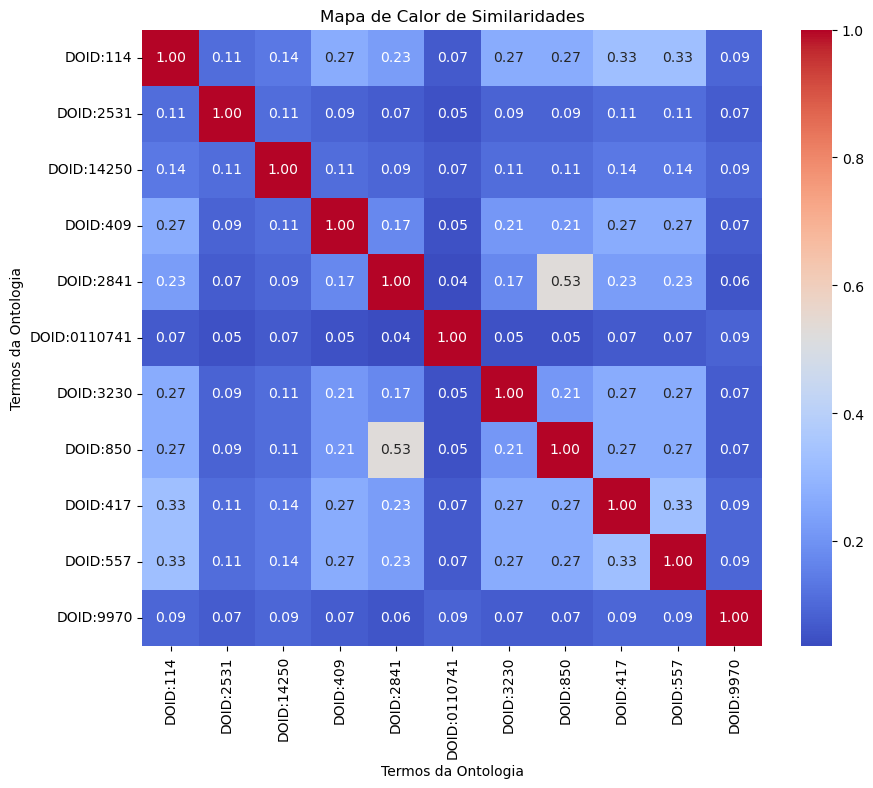

In [19]:
# Matriz de similaridades do arquivo CSV 

matriz_similaridades = pd.read_csv("matriz_similaridades.csv", index_col=0) 

# Mapa de calor 

plt.figure(figsize=(10, 8)) 

sns.heatmap(matriz_similaridades, cmap="coolwarm", annot=True, fmt=".2f") 

plt.title("Mapa de Calor de Similaridades") 

plt.xlabel("Termos da Ontologia") 

plt.ylabel("Termos da Ontologia") 

## Modelo tradicional 

Criação do mapa de calor proviniente da Matriz de similaridades do R.

### Formação de dados_dose

In [20]:
# Dicionário para renomear as colunas
novo_nome_colunas = {
    'CARDIOPATI_m': 'DOID:114',
    'HEMATOLOGI_m': 'DOID:2531',
    'SIND_DOWN_m': 'DOID:14250',
    'HEPATICA_m': 'DOID:409',
    'ASMA_m': 'DOID:2841',
    'DIABETES_m': 'DOID:0110741',
    'NEUROLOGIC_m': 'DOID:3230',
    'PNEUMOPATI_m': 'DOID:850',
    'IMUNODEPRE_m': 'DOID:417',
    'RENAL_m': 'DOID:557',
    'OBESIDADE_m': 'DOID:9970'
}

dados_dose = dados.rename(columns=novo_nome_colunas)
print(dados_dose)

         CS_SEXO  NU_IDADE_N  DOID:114  DOID:2531  DOID:14250  DOID:409  \
0              1    0.373737         0          0           0         0   
1              0    0.414141         0          0           0         0   
2              0    0.727273         1          0           0         0   
3              1    0.404040         0          0           0         0   
4              0    0.343434         1          0           0         0   
...          ...         ...       ...        ...         ...       ...   
1671974        1    0.484848         1          0           0         0   
1671975        1    0.474747         1          0           0         0   
1671976        0    0.434343         0          0           0         0   
1671977        1    0.131313         0          0           0         0   
1671978        1    0.454545         1          0           0         0   

         DOID:2841  DOID:0110741  DOID:3230  DOID:850  ...  IS_CAPITAL  UTI  \
0                0  

In [21]:
dados_dose.columns

Index(['CS_SEXO', 'NU_IDADE_N', 'DOID:114', 'DOID:2531', 'DOID:14250',
       'DOID:409', 'DOID:2841', 'DOID:0110741', 'DOID:3230', 'DOID:850',
       'DOID:417', 'DOID:557', 'DOID:9970', 'IS_CAPITAL', 'UTI', 'IS_DEATH',
       'White', 'Black/Brown', 'Asian', 'Indigenous', 'IDH_MUM_RES',
       'IDH_MU_INTE', 'mesmo_mun'],
      dtype='object')

In [22]:
# Lista das colunas que serão mantidas
colunas_utilizadas = ['DOID:114', 'DOID:2531', 'DOID:14250',
       'DOID:409', 'DOID:2841', 'DOID:0110741', 'DOID:3230', 'DOID:850',
       'DOID:417', 'DOID:557', 'DOID:9970']

dados_dose = dados_dose[colunas_utilizadas]

print(dados_dose)

         DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  DOID:0110741  \
0               0          0           0         0          0             0   
1               0          0           0         0          0             0   
2               1          0           0         0          0             0   
3               0          0           0         0          0             1   
4               1          0           0         0          0             0   
...           ...        ...         ...       ...        ...           ...   
1671974         1          0           0         0          0             0   
1671975         1          0           0         0          0             1   
1671976         0          0           0         0          0             0   
1671977         0          0           0         0          0             0   
1671978         1          0           0         0          0             0   

         DOID:3230  DOID:850  DOID:417  DOID:557  D

### Formação do dados_dose_final 

In [23]:

# Função para renomear as linhas
def renomear_linhas(row):
    doencas_presentes = [coluna for coluna, valor in row.items() if valor == 1]
    if len(doencas_presentes) == 0:
        return str(row.name)  # Retorna o índice original se o paciente não tiver nenhuma doença
    doencas_presentes.sort()
    return ','.join(doencas_presentes)

# Renomeando as linhas
dados_dose_resultado = dados_dose.apply(renomear_linhas, axis=1)

# Criando um novo dataframe com as linhas renomeadas
dados_dose_final = dados_dose.copy()
dados_dose_final.index = dados_dose_resultado

# Exibindo o DataFrame final
print(dados_dose_final)


                                DOID:114  DOID:2531  DOID:14250  DOID:409  \
0                                      0          0           0         0   
1                                      0          0           0         0   
DOID:114,DOID:3230                     1          0           0         0   
DOID:0110741                           0          0           0         0   
DOID:114,DOID:9970                     1          0           0         0   
...                                  ...        ...         ...       ...   
DOID:114                               1          0           0         0   
DOID:0110741,DOID:114,DOID:557         1          0           0         0   
1671976                                0          0           0         0   
1671977                                0          0           0         0   
DOID:114                               1          0           0         0   

                                DOID:2841  DOID:0110741  DOID:3230  DOID:85

In [24]:
dados_dose_final.head(15)     

DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  \
0                             0          0           0         0          0   
1                             0          0           0         0          0   
DOID:114,DOID:3230            1          0           0         0          0   
DOID:0110741                  0          0           0         0          0   
DOID:114,DOID:9970            1          0           0         0          0   
DOID:0110741,DOID:114         1          0           0         0          0   
6                             0          0           0         0          0   
7                             0          0           0         0          0   
DOID:0110741,DOID:114         1          0           0         0          0   
DOID:114                      1          0           0         0          0   
10                            0          0           0         0          0   
11                            0          0           0         0          0   
12                            0          0           0         0          0   
DOID:0110741,DOID:114         1          0           0         0          0   
14                            0          0           0         0          0   

                       DOID:0110741  DOID:3230  DOID:850  DOID:417  DOID:557  \
0                                 0          0         0         0         0   
1                                 0          0         0         0         0   
DOID:114,DOID:3230                0          1         0         0         0   
DOID:0110741                      1          0         0         0         0   
DOID:114,DOID:9970                0          0         0         0         0   
DOID:0110741,DOID:114             1          0         0         0         0   
6                                 0          0         0         0         0   
7                                 0          0         0         0         0   
DOID:0110741,DOID:114             1          0         0         0         0   
DOID:114                          0          0         0         0         0   
10                                0          0         0         0         0   
11                                0          0         0         0         0   
12                                0          0         0         0         0   
DOID:0110741,DOID:114             1          0         0         0         0   
14                                0          0         0         0         0   

                       DOID:9970  
0                              0  
1                              0  
DOID:114,DOID:3230             0  
DOID:0110741                   0  
DOID:114,DOID:9970             1  
DOID:0110741,DOID:114          0  
6                              0  
7                              0  
DOID:0110741,DOID:114          0  
DOID:114                       0  
10                             0  
11                             0  
12                             0  
DOID:0110741,DOID:114          0  
14                             0

### Formação do df_similaridades 

In [25]:

# Conjunto para armazenar os índices que não são apenas números
indices_nao_numericos = set()

# Iterar sobre o índice de dados_dose_final
for index in dados_dose_final.index:
    # Verificar se o índice não é um número
    if not index.isnumeric():
        # Adicionar o índice ao conjunto indices_nao_numericos
        indices_nao_numericos.add(index)

# Criar um DataFrame a partir do conjunto de índices
df_indices_dose = pd.DataFrame(list(indices_nao_numericos), columns=['Index'])

# Salvar o DataFrame em um arquivo CSV
#df_indices_dose.to_csv('indices_dose.csv', index=False)



In [26]:
df_indices_dose

Index
0    DOID:0110741,DOID:114,DOID:2841,DOID:409,DOID:...
1             DOID:0110741,DOID:3230,DOID:409,DOID:850
2    DOID:0110741,DOID:114,DOID:14250,DOID:3230,DOI...
3    DOID:0110741,DOID:114,DOID:3230,DOID:409,DOID:557
4    DOID:0110741,DOID:14250,DOID:2531,DOID:3230,DO...
..                                                 ...
947           DOID:0110741,DOID:409,DOID:557,DOID:9970
948            DOID:114,DOID:14250,DOID:3230,DOID:9970
949         DOID:0110741,DOID:114,DOID:14250,DOID:3230
950  DOID:0110741,DOID:114,DOID:409,DOID:557,DOID:8...
951  DOID:0110741,DOID:114,DOID:2531,DOID:3230,DOID...

[952 rows x 1 columns]

In [27]:
# Carregar o arquivo CSV em um DataFrame
df_similaridades = pd.read_csv('similaridades.csv', index_col=0)

# Exibir o DataFrame
df_similaridades 

DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  DOID:0110741  \
1    0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
2    0.135413   0.109892    1.000000  0.109892   0.093360      0.069899   
3    0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
4    1.000000   0.109892    0.135413  0.266882   0.226732      0.069899   
5    0.109892   1.000000    0.109892  0.086582   0.071430      0.049858   
..        ...        ...         ...       ...        ...           ...   
948  1.000000   0.109892    0.135413  0.266882   0.226732      0.069899   
949  1.000000   0.109892    0.135413  0.266882   0.226732      0.069899   
950  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
951  1.000000   0.109892    0.135413  0.266882   0.226732      0.069899   
952  0.226732   0.071430    0.093360  0.173473   1.000000      0.036762   

     DOID:3230  DOID:850  DOID:417  DOID:557  DOID:9970  
1     0.049858  0.049858  0.069899  0.069899   0.089279  
2     0.109892  0.109892  0.135413  0.135413   0.093360  
3     0.049858  0.049858  0.069899  0.069899   0.089279  
4     0.266882  0.266882  0.328859  0.328859   0.093360  
5     0.086582  0.086582  0.109892  0.109892   0.071430  
..         ...       ...       ...       ...        ...  
948   0.266882  0.266882  0.328859  0.328859   0.093360  
949   0.266882  0.266882  0.328859  0.328859   0.093360  
950   0.049858  0.049858  0.069899  0.069899   0.089279  
951   0.266882  0.266882  0.328859  0.328859   0.093360  
952   0.173473  0.527499  0.226732  0.226732   0.057144  

[952 rows x 11 columns]

In [28]:

# Extrair os códigos DOID de df_indices_dose
codigos_doid = df_indices_dose['Index'].str.split(',').apply(lambda x: ','.join(sorted(x))).tolist()

# Substituir os índices numéricos de df_similaridades pelos códigos DOID correspondentes
df_similaridades.index = codigos_doid

# Exibir o DataFrame df_similaridades com os códigos DOID como índices
print(df_similaridades)



                                                    DOID:114  DOID:2531  \
DOID:0110741,DOID:114,DOID:2841,DOID:409,DOID:4...  0.069899   0.049858   
DOID:0110741,DOID:3230,DOID:409,DOID:850            0.135413   0.109892   
DOID:0110741,DOID:114,DOID:14250,DOID:3230,DOID...  0.069899   0.049858   
DOID:0110741,DOID:114,DOID:3230,DOID:409,DOID:557   1.000000   0.109892   
DOID:0110741,DOID:14250,DOID:2531,DOID:3230,DOI...  0.109892   1.000000   
...                                                      ...        ...   
DOID:0110741,DOID:409,DOID:557,DOID:9970            1.000000   0.109892   
DOID:114,DOID:14250,DOID:3230,DOID:9970             1.000000   0.109892   
DOID:0110741,DOID:114,DOID:14250,DOID:3230          0.069899   0.049858   
DOID:0110741,DOID:114,DOID:409,DOID:557,DOID:85...  1.000000   0.109892   
DOID:0110741,DOID:114,DOID:2531,DOID:3230,DOID:...  0.226732   0.071430   

                                                    DOID:14250  DOID:409  \
DOID:0110741,DOID:114,D

In [29]:
df_similaridades.head(10) 

DOID:114  DOID:2531  \
DOID:0110741,DOID:114,DOID:2841,DOID:409,DOID:4...  0.069899   0.049858   
DOID:0110741,DOID:3230,DOID:409,DOID:850            0.135413   0.109892   
DOID:0110741,DOID:114,DOID:14250,DOID:3230,DOID...  0.069899   0.049858   
DOID:0110741,DOID:114,DOID:3230,DOID:409,DOID:557   1.000000   0.109892   
DOID:0110741,DOID:14250,DOID:2531,DOID:3230,DOI...  0.109892   1.000000   
DOID:114,DOID:2531,DOID:409,DOID:557,DOID:9970      0.109892   1.000000   
DOID:0110741,DOID:14250,DOID:2841,DOID:3230,DOI...  0.069899   0.049858   
DOID:114,DOID:14250,DOID:2531,DOID:3230,DOID:40...  1.000000   0.109892   
DOID:2841,DOID:417,DOID:850                         0.328859   0.109892   
DOID:0110741,DOID:2531,DOID:409,DOID:417            0.226732   0.071430   

                                                    DOID:14250  DOID:409  \
DOID:0110741,DOID:114,DOID:2841,DOID:409,DOID:4...    0.069899  0.049858   
DOID:0110741,DOID:3230,DOID:409,DOID:850              1.000000  0.109892   
DOID:0110741,DOID:114,DOID:14250,DOID:3230,DOID...    0.069899  0.049858   
DOID:0110741,DOID:114,DOID:3230,DOID:409,DOID:557     0.135413  0.266882   
DOID:0110741,DOID:14250,DOID:2531,DOID:3230,DOI...    0.109892  0.086582   
DOID:114,DOID:2531,DOID:409,DOID:557,DOID:9970        0.109892  0.086582   
DOID:0110741,DOID:14250,DOID:2841,DOID:3230,DOI...    0.069899  0.049858   
DOID:114,DOID:14250,DOID:2531,DOID:3230,DOID:40...    0.135413  0.266882   
DOID:2841,DOID:417,DOID:850                           0.135413  0.266882   
DOID:0110741,DOID:2531,DOID:409,DOID:417              0.093360  0.173473   

                                                    DOID:2841  DOID:0110741  \
DOID:0110741,DOID:114,DOID:2841,DOID:409,DOID:4...   0.036762      1.000000   
DOID:0110741,DOID:3230,DOID:409,DOID:850             0.093360      0.069899   
DOID:0110741,DOID:114,DOID:14250,DOID:3230,DOID...   0.036762      1.000000   
DOID:0110741,DOID:114,DOID:3230,DOID:409,DOID:557    0.226732      0.069899   
DOID:0110741,DOID:14250,DOID:2531,DOID:3230,DOI...   0.071430      0.049858   
DOID:114,DOID:2531,DOID:409,DOID:557,DOID:9970       0.071430      0.049858   
DOID:0110741,DOID:14250,DOID:2841,DOID:3230,DOI...   0.036762      1.000000   
DOID:114,DOID:14250,DOID:2531,DOID:3230,DOID:40...   0.226732      0.069899   
DOID:2841,DOID:417,DOID:850                          0.226732      0.069899   
DOID:0110741,DOID:2531,DOID:409,DOID:417             1.000000      0.036762   

                                                    DOID:3230  DOID:850  \
DOID:0110741,DOID:114,DOID:2841,DOID:409,DOID:4...   0.049858  0.049858   
DOID:0110741,DOID:3230,DOID:409,DOID:850             0.109892  0.109892   
DOID:0110741,DOID:114,DOID:14250,DOID:3230,DOID...   0.049858  0.049858   
DOID:0110741,DOID:114,DOID:3230,DOID:409,DOID:557    0.266882  0.266882   
DOID:0110741,DOID:14250,DOID:2531,DOID:3230,DOI...   0.086582  0.086582   
DOID:114,DOID:2531,DOID:409,DOID:557,DOID:9970       0.086582  0.086582   
DOID:0110741,DOID:14250,DOID:2841,DOID:3230,DOI...   0.049858  0.049858   
DOID:114,DOID:14250,DOID:2531,DOID:3230,DOID:40...   0.266882  0.266882   
DOID:2841,DOID:417,DOID:850                          0.266882  0.266882   
DOID:0110741,DOID:2531,DOID:409,DOID:417             0.173473  0.527499   

                                                    DOID:417  DOID:557  \
DOID:0110741,DOID:114,DOID:2841,DOID:409,DOID:4...  0.069899  0.069899   
DOID:0110741,DOID:3230,DOID:409,DOID:850            0.135413  0.135413   
DOID:0110741,DOID:114,DOID:14250,DOID:3230,DOID...  0.069899  0.069899   
DOID:0110741,DOID:114,DOID:3230,DOID:409,DOID:557   0.328859  0.328859   
DOID:0110741,DOID:14250,DOID:2531,DOID:3230,DOI...  0.109892  0.109892   
DOID:114,DOID:2531,DOID:409,DOID:557,DOID:9970      0.109892  0.109892   
DOID:0110741,DOID:14250,DOID:2841,DOID:3230,DOI...  0.069899  0.069899   
DOID:114,DOID:14250,DOID:2531,DOID:3230,DOID:40...  0.328859  0.328859   
DOID:2841,DOID:417,DOID:850

### Formação do dados_dose_definitivo 


## Teste final


In [30]:
# Copiar o DataFrame dados_dose_final para dados_dose_definitivo
dados_dose_definitivo = dados_dose_final.copy()

# Encontrar as linhas não numéricas em dados_dose_definitivo que têm correspondência no índice de df_similaridades
linhas_nao_numericas = dados_dose_definitivo.index[~dados_dose_definitivo.index.str.isnumeric()]

# Selecionar apenas os índices presentes em ambas as séries
indices_nao_numericos = linhas_nao_numericas.intersection(df_similaridades.index)

# Substituir os valores das linhas não numéricas em dados_dose_definitivo pelos valores correspondentes em df_similaridades
dados_dose_definitivo.update(df_similaridades.loc[indices_nao_numericos])

# Exibir o DataFrame dados_dose_definitivo após a substituição
print(dados_dose_definitivo)


                                DOID:114  DOID:2531  DOID:14250  DOID:409  \
0                               0.000000   0.000000    0.000000  0.000000   
1                               0.000000   0.000000    0.000000  0.000000   
DOID:114,DOID:3230              0.069899   0.049858    0.069899  0.049858   
DOID:0110741                    0.135413   0.109892    1.000000  0.109892   
DOID:114,DOID:9970              0.069899   0.049858    0.069899  0.049858   
...                                  ...        ...         ...       ...   
DOID:114                        0.069899   0.049858    0.069899  0.049858   
DOID:0110741,DOID:114,DOID:557  1.000000   0.109892    0.135413  0.266882   
1671976                         0.000000   0.000000    0.000000  0.000000   
1671977                         0.000000   0.000000    0.000000  0.000000   
DOID:114                        0.069899   0.049858    0.069899  0.049858   

                                DOID:2841  DOID:0110741  DOID:3230  DOID:85

In [31]:
dados_dose_definitivo.head(10) 

DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  \
0                      0.000000   0.000000    0.000000  0.000000   0.000000   
1                      0.000000   0.000000    0.000000  0.000000   0.000000   
DOID:114,DOID:3230     0.069899   0.049858    0.069899  0.049858   0.036762   
DOID:0110741           0.135413   0.109892    1.000000  0.109892   0.093360   
DOID:114,DOID:9970     0.069899   0.049858    0.069899  0.049858   0.036762   
DOID:0110741,DOID:114  0.328859   0.109892    0.135413  0.266882   0.226732   
6                      0.000000   0.000000    0.000000  0.000000   0.000000   
7                      0.000000   0.000000    0.000000  0.000000   0.000000   
DOID:0110741,DOID:114  0.328859   0.109892    0.135413  0.266882   0.226732   
DOID:114               0.069899   0.049858    0.069899  0.049858   0.036762   

                       DOID:0110741  DOID:3230  DOID:850  DOID:417  DOID:557  \
0                          0.000000   0.000000  0.000000  0.000000  0.000000   
1                          0.000000   0.000000  0.000000  0.000000  0.000000   
DOID:114,DOID:3230         1.000000   0.049858  0.049858  0.069899  0.069899   
DOID:0110741               0.069899   0.109892  0.109892  0.135413  0.135413   
DOID:114,DOID:9970         1.000000   0.049858  0.049858  0.069899  0.069899   
DOID:0110741,DOID:114      0.069899   0.266882  0.266882  1.000000  0.328859   
6                          0.000000   0.000000  0.000000  0.000000  0.000000   
7                          0.000000   0.000000  0.000000  0.000000  0.000000   
DOID:0110741,DOID:114      0.069899   0.266882  0.266882  1.000000  0.328859   
DOID:114                   1.000000   0.049858  0.049858  0.069899  0.069899   

                       DOID:9970  
0                       0.000000  
1                       0.000000  
DOID:114,DOID:3230      0.089279  
DOID:0110741            0.093360  
DOID:114,DOID:9970      0.089279  
DOID:0110741,DOID:114   0.093360  
6                       0.000000  
7                       0.000000  
DOID:0110741,DOID:114   0.093360  
DOID:114                0.089279

# Aplicação da Ontologia nos dados de análise 

#### Colunas de análise:

'CARDIOPATI_m', 'HEMATOLOGI_m', 'SIND_DOWN_m', 'HEPATICA_m', 'ASMA_m', 'DIABETES_m', 'NEUROLOGIC_m', 'PNEUMOPATI_m', 'IMUNODEPRE_m', 'RENAL_m', 'OBESIDADE_m''IS_CAPITAL', 'UTI',
       'IS_DEATH', 'White', 'Black/Brown', 'Asian', 'Indigenous',
       'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun'

## Análise de dados

In [32]:
# Importação dos dados
srag_tratado = pd.read_csv("srag_tratada.csv", low_memory = False)
dados_01 = srag_tratado.copy().drop("ID", axis = 1)
print("Visualizando os primeiros registros dos dados:")
print(dados_01.head()) 

Visualizando os primeiros registros dos dados:
   CS_SEXO  NU_IDADE_N  CARDIOPATI_m  HEMATOLOGI_m  SIND_DOWN_m  HEPATICA_m  \
0        1    0.373737             0             0            0           0   
1        0    0.414141             0             0            0           0   
2        0    0.727273             1             0            0           0   
3        1    0.404040             0             0            0           0   
4        0    0.343434             1             0            0           0   

   ASMA_m  DIABETES_m  NEUROLOGIC_m  PNEUMOPATI_m  ...  IS_CAPITAL  UTI  \
0       0           0             0             0  ...           1    0   
1       0           0             0             0  ...           1    0   
2       0           0             1             0  ...           1    0   
3       0           1             0             0  ...           1    1   
4       0           0             0             0  ...           1    1   

   IS_DEATH  White  Black/B

In [33]:
dados_dose_definitivo.head(10) 

DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  \
0                      0.000000   0.000000    0.000000  0.000000   0.000000   
1                      0.000000   0.000000    0.000000  0.000000   0.000000   
DOID:114,DOID:3230     0.069899   0.049858    0.069899  0.049858   0.036762   
DOID:0110741           0.135413   0.109892    1.000000  0.109892   0.093360   
DOID:114,DOID:9970     0.069899   0.049858    0.069899  0.049858   0.036762   
DOID:0110741,DOID:114  0.328859   0.109892    0.135413  0.266882   0.226732   
6                      0.000000   0.000000    0.000000  0.000000   0.000000   
7                      0.000000   0.000000    0.000000  0.000000   0.000000   
DOID:0110741,DOID:114  0.328859   0.109892    0.135413  0.266882   0.226732   
DOID:114               0.069899   0.049858    0.069899  0.049858   0.036762   

                       DOID:0110741  DOID:3230  DOID:850  DOID:417  DOID:557  \
0                          0.000000   0.000000  0.000000  0.000000  0.000000   
1                          0.000000   0.000000  0.000000  0.000000  0.000000   
DOID:114,DOID:3230         1.000000   0.049858  0.049858  0.069899  0.069899   
DOID:0110741               0.069899   0.109892  0.109892  0.135413  0.135413   
DOID:114,DOID:9970         1.000000   0.049858  0.049858  0.069899  0.069899   
DOID:0110741,DOID:114      0.069899   0.266882  0.266882  1.000000  0.328859   
6                          0.000000   0.000000  0.000000  0.000000  0.000000   
7                          0.000000   0.000000  0.000000  0.000000  0.000000   
DOID:0110741,DOID:114      0.069899   0.266882  0.266882  1.000000  0.328859   
DOID:114                   1.000000   0.049858  0.049858  0.069899  0.069899   

                       DOID:9970  
0                       0.000000  
1                       0.000000  
DOID:114,DOID:3230      0.089279  
DOID:0110741            0.093360  
DOID:114,DOID:9970      0.089279  
DOID:0110741,DOID:114   0.093360  
6                       0.000000  
7                       0.000000  
DOID:0110741,DOID:114   0.093360  
DOID:114                0.089279

In [34]:
dados_dose_definitivo


DOID:114  DOID:2531  DOID:14250  DOID:409  \
0                               0.000000   0.000000    0.000000  0.000000   
1                               0.000000   0.000000    0.000000  0.000000   
DOID:114,DOID:3230              0.069899   0.049858    0.069899  0.049858   
DOID:0110741                    0.135413   0.109892    1.000000  0.109892   
DOID:114,DOID:9970              0.069899   0.049858    0.069899  0.049858   
...                                  ...        ...         ...       ...   
DOID:114                        0.069899   0.049858    0.069899  0.049858   
DOID:0110741,DOID:114,DOID:557  1.000000   0.109892    0.135413  0.266882   
1671976                         0.000000   0.000000    0.000000  0.000000   
1671977                         0.000000   0.000000    0.000000  0.000000   
DOID:114                        0.069899   0.049858    0.069899  0.049858   

                                DOID:2841  DOID:0110741  DOID:3230  DOID:850  \
0                                0.000000      0.000000   0.000000  0.000000   
1                                0.000000      0.000000   0.000000  0.000000   
DOID:114,DOID:3230               0.036762      1.000000   0.049858  0.049858   
DOID:0110741                     0.093360      0.069899   0.109892  0.109892   
DOID:114,DOID:9970               0.036762      1.000000   0.049858  0.049858   
...                                   ...           ...        ...       ...   
DOID:114                         0.036762      1.000000   0.049858  0.049858   
DOID:0110741,DOID:114,DOID:557   0.226732      0.069899   0.266882  0.266882   
1671976                          0.000000      0.000000   0.000000  0.000000   
1671977                          0.000000      0.000000   0.000000  0.000000   
DOID:114                         0.036762      1.000000   0.049858  0.049858   

                                DOID:417  DOID:557  DOID:9970  
0                               0.000000  0.000000   0.000000  
1                               0.000000  0.000000   0.000000  
DOID:114,DOID:3230              0.069899  0.069899   0.089279  
DOID:0110741                    0.135413  0.135413   0.093360  
DOID:114,DOID:9970              0.069899  0.069899   0.089279  
...                                  ...       ...        ...  
DOID:114                        0.069899  0.069899   0.089279  
DOID:0110741,DOID:114,DOID:557  0.328859  0.328859   0.093360  
1671976                         0.000000  0.000000   0.000000  
1671977                         0.000000  0.000000   0.000000  
DOID:114                        0.069899  0.069899   0.089279  

[1671979 rows x 11 columns]

'ID', 'CS_SEXO', 'NU_IDADE_N', 'CARDIOPATI_m', 'HEMATOLOGI_m',
       'SIND_DOWN_m', 'HEPATICA_m', 'ASMA_m', 'DIABETES_m', 'NEUROLOGIC_m',
       'PNEUMOPATI_m', 'IMUNODEPRE_m', 'RENAL_m', 'OBESIDADE_m', 'IS_CAPITAL',
       'UTI', 'IS_DEATH', 'White', 'Black/Brown', 'Asian', 'Indigenous',
       'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun']  
       

In [35]:
# Selecionar apenas as colunas desejadas do DataFrame 'dados'
dados_selecionados = dados[['CS_SEXO', 'NU_IDADE_N','IS_CAPITAL', 'UTI', 'White', 'Black/Brown', 'Asian', 'Indigenous', 'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun']]

# Concatenar os DataFrames 'dados_dose_definitivo' e 'dados_selecionados' ao longo das colunas (axis=1)
dados_dose_definitivo_01 = pd.concat([dados_dose_definitivo.reset_index(drop = True), dados_selecionados.reset_index(drop = True)],axis=1) 

# Exibir o DataFrame resultante
dados_dose_definitivo_01

DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  DOID:0110741  \
0        0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1        0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
2        0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
3        0.135413   0.109892    1.000000  0.109892   0.093360      0.069899   
4        0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
...           ...        ...         ...       ...        ...           ...   
1671974  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
1671975  1.000000   0.109892    0.135413  0.266882   0.226732      0.069899   
1671976  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1671977  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1671978  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   

         DOID:3230  DOID:850  DOID:417  DOID:557  ...  NU_IDADE_N  IS_CAPITAL  \
0         0.000000  0.000000  0.000000  0.000000  ...    0.373737           1   
1         0.000000  0.000000  0.000000  0.000000  ...    0.414141           1   
2         0.049858  0.049858  0.069899  0.069899  ...    0.727273           1   
3         0.109892  0.109892  0.135413  0.135413  ...    0.404040           1   
4         0.049858  0.049858  0.069899  0.069899  ...    0.343434           1   
...            ...       ...       ...       ...  ...         ...         ...   
1671974   0.049858  0.049858  0.069899  0.069899  ...    0.484848           1   
1671975   0.266882  0.266882  0.328859  0.328859  ...    0.474747           1   
1671976   0.000000  0.000000  0.000000  0.000000  ...    0.434343           0   
1671977   0.000000  0.000000  0.000000  0.000000  ...    0.131313           0   
1671978   0.049858  0.049858  0.069899  0.069899  ...    0.454545           1   

         UTI  White  Black/Brown  Asian  Indigenous  IDH_MUM_RES  IDH_MU_INTE  \
0          0      0            0      0           0     0.871622     0.871622   
1          0      0            0      0           0     0.871622     0.871622   
2          0      1            0      0           0     0.871622     0.871622   
3          1      1            0      0           0     0.871622     0.871622   
4          1      1            0      0           0     0.871622     0.871622   
...      ...    ...          ...    ...         ...          ...          ...   
1671974    1      0            0      0           0     0.871622     0.871622   
1671975    0      1            0      0           0     0.871622     0.871622   
1671976    0      1            0      0           0     0.871622     0.779259   
1671977    0      1            0      0           0     0.639640     0.810811   
1671978    0      1            0      0           0     0.871622     0.871622   

         mesmo_mun  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
1671974          1  
1671975          1  
1671976          0  
1671977          0  
1671978          1  

[1671979 rows x 22 columns]

In [36]:
dados_dose_definitivo_01.head(10) 

DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  DOID:0110741  \
0  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
2  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
3  0.135413   0.109892    1.000000  0.109892   0.093360      0.069899   
4  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
5  0.328859   0.109892    0.135413  0.266882   0.226732      0.069899   
6  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
7  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
8  0.328859   0.109892    0.135413  0.266882   0.226732      0.069899   
9  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   

   DOID:3230  DOID:850  DOID:417  DOID:557  ...  NU_IDADE_N  IS_CAPITAL  UTI  \
0   0.000000  0.000000  0.000000  0.000000  ...    0.373737           1    0   
1   0.000000  0.000000  0.000000  0.000000  ...    0.414141           1    0   
2   0.049858  0.049858  0.069899  0.069899  ...    0.727273           1    0   
3   0.109892  0.109892  0.135413  0.135413  ...    0.404040           1    1   
4   0.049858  0.049858  0.069899  0.069899  ...    0.343434           1    1   
5   0.266882  0.266882  1.000000  0.328859  ...    0.484848           1    0   
6   0.000000  0.000000  0.000000  0.000000  ...    0.474747           1    1   
7   0.000000  0.000000  0.000000  0.000000  ...    0.525253           1    0   
8   0.266882  0.266882  1.000000  0.328859  ...    0.474747           1    1   
9   0.049858  0.049858  0.069899  0.069899  ...    0.474747           0    1   

   White  Black/Brown  Asian  Indigenous  IDH_MUM_RES  IDH_MU_INTE  mesmo_mun  
0      0            0      0           0     0.871622     0.871622          1  
1      0            0      0           0     0.871622     0.871622          1  
2      1            0      0           0     0.871622     0.871622          1  
3      1            0      0           0     0.871622     0.871622          1  
4      1            0      0           0     0.871622     0.871622          1  
5      1            0      0           0     0.871622     0.871622          1  
6      0            0      0           0     0.828829     0.871622          0  
7      0            1      0           0     0.871622     0.871622          1  
8      0            0      0           0     0.871622     0.871622          1  
9      1            0      0           0     0.795045     0.795045          1  

[10 rows x 22 columns]

# PCA (Caso mais avançado) 

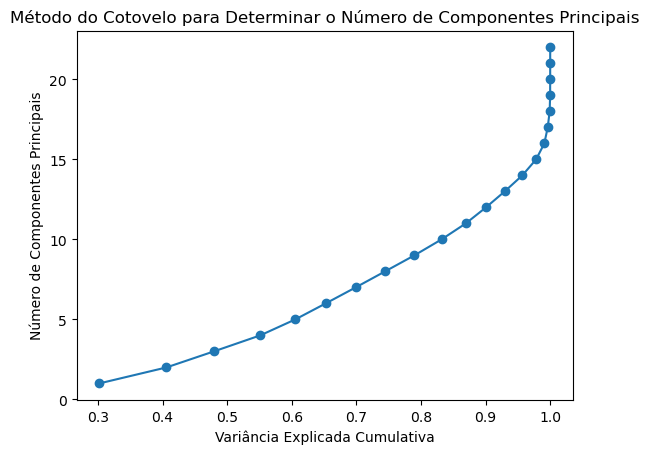

In [37]:
# Normalizando os dados (opcional, mas geralmente uma boa prática)
dados_norm = (dados_dose_definitivo_01 - dados_dose_definitivo_01.mean()) / dados_dose_definitivo_01.std()

# Inicializando o objeto PCA sem especificar o número de componentes principais
pca = PCA()

# Aplicando a transformação PCA aos dados normalizados
pca.fit(dados_norm)

# Calcular a variância explicada cumulativa
var_exp_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plotar a variância explicada cumulativa em relação ao número de componentes, invertendo os eixos
plt.plot(var_exp_cumulative, range(1, len(var_exp_cumulative) + 1), marker='o')
plt.ylabel('Número de Componentes Principais')
plt.xlabel('Variância Explicada Cumulativa')
plt.title('Método do Cotovelo para Determinar o Número de Componentes Principais')
plt.show()


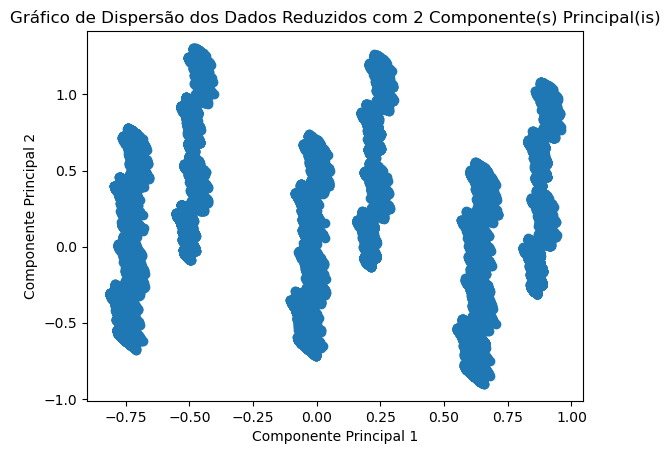

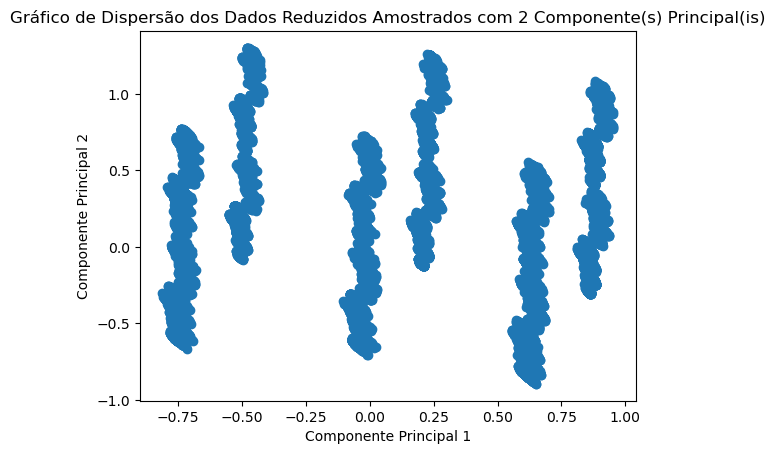

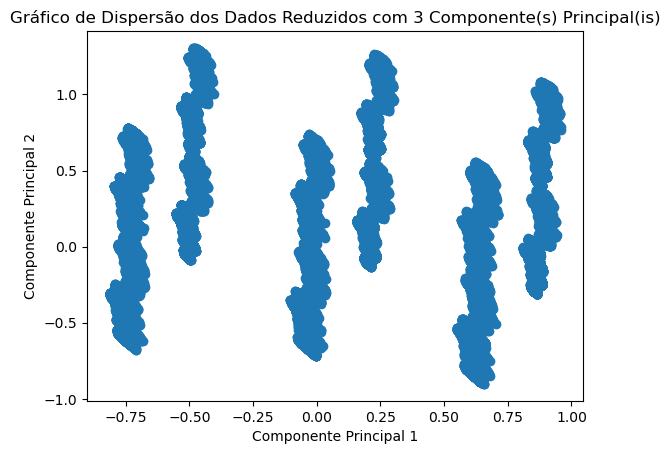

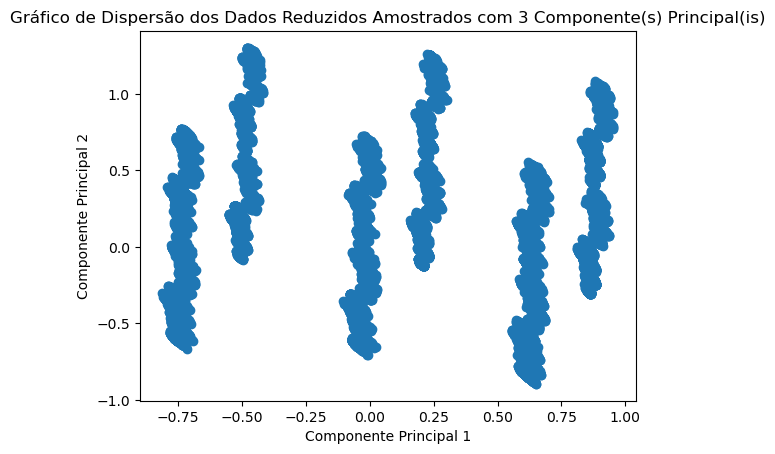

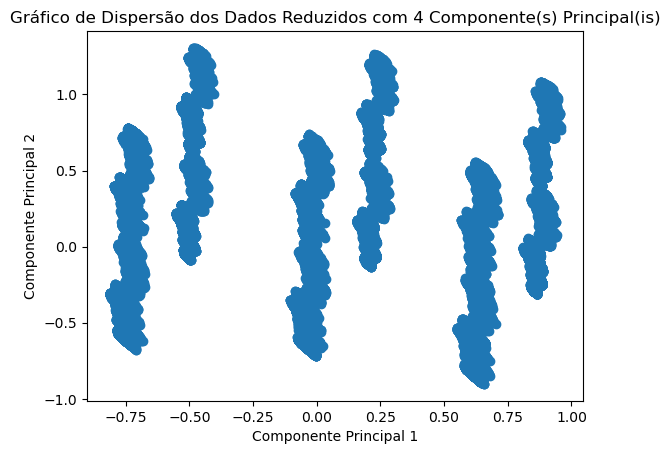

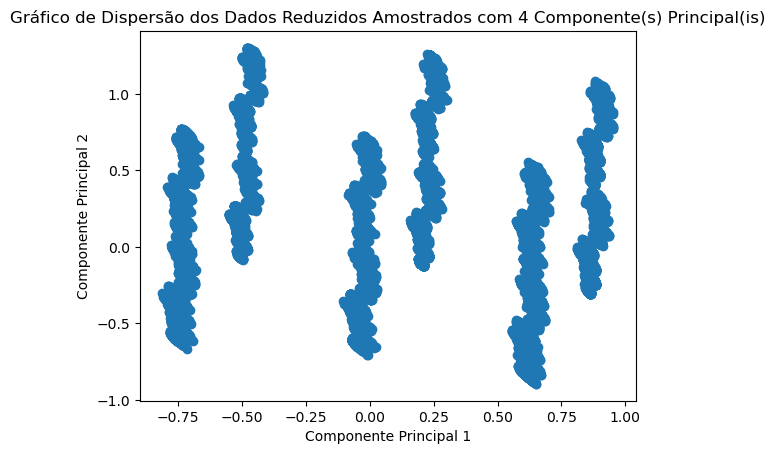

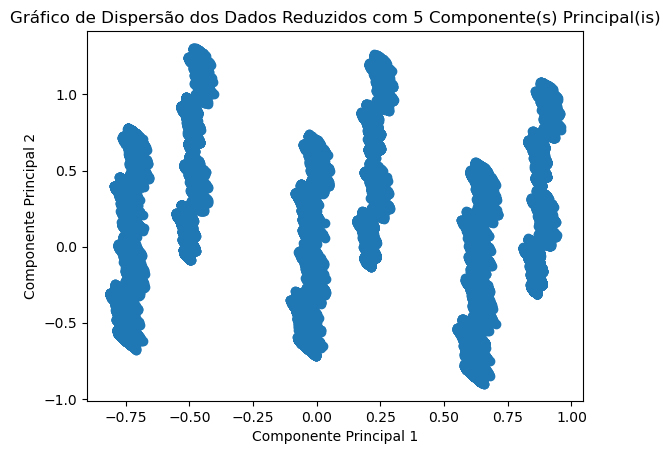

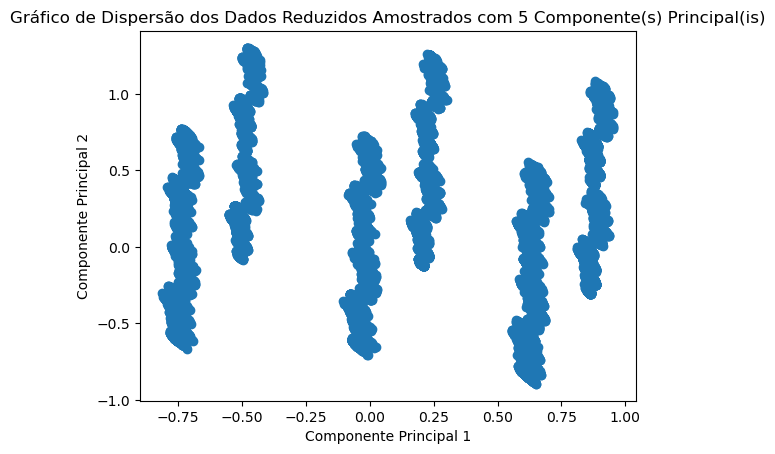

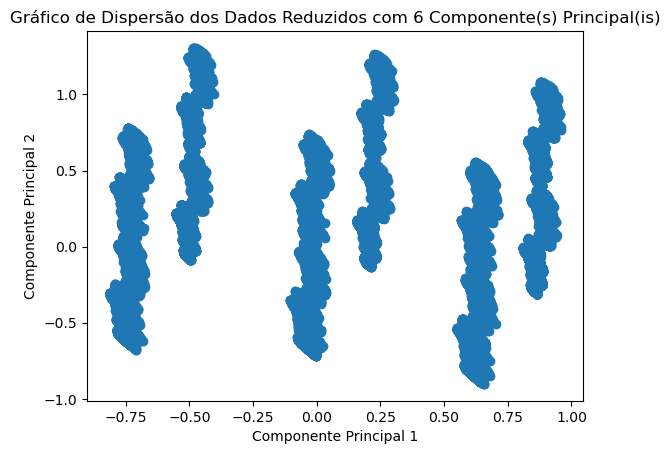

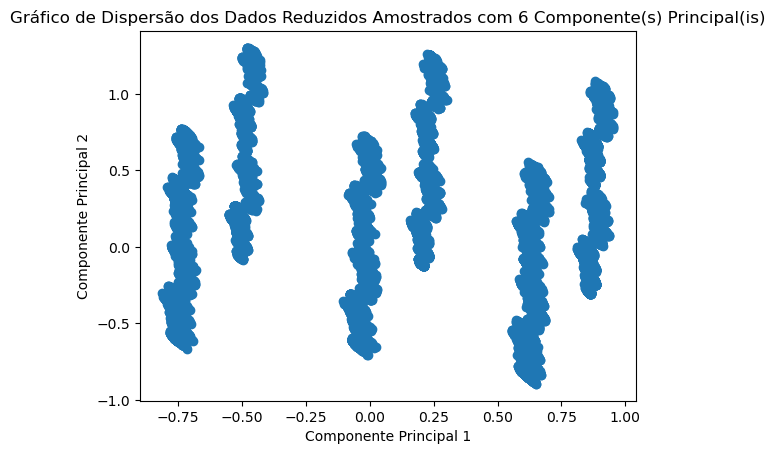

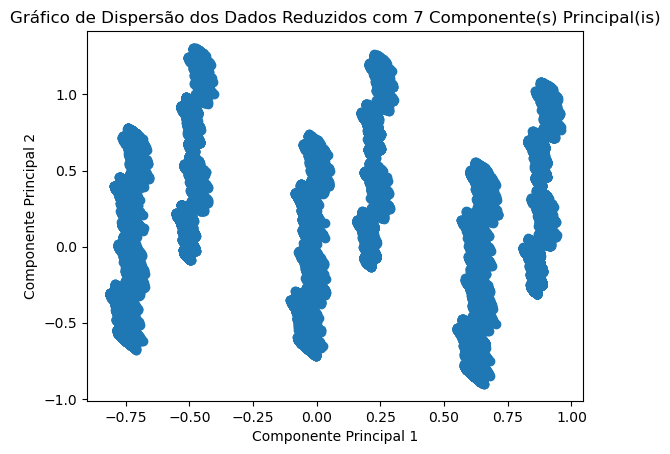

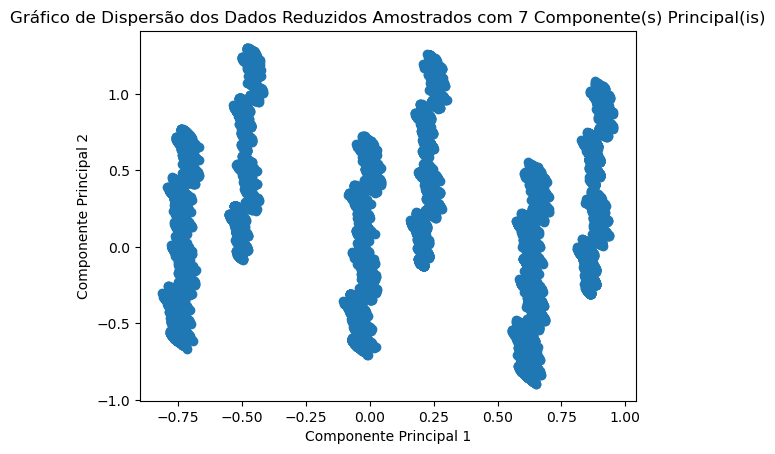

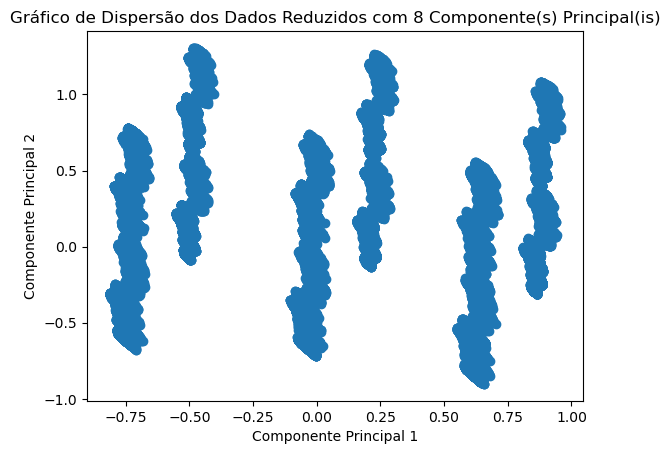

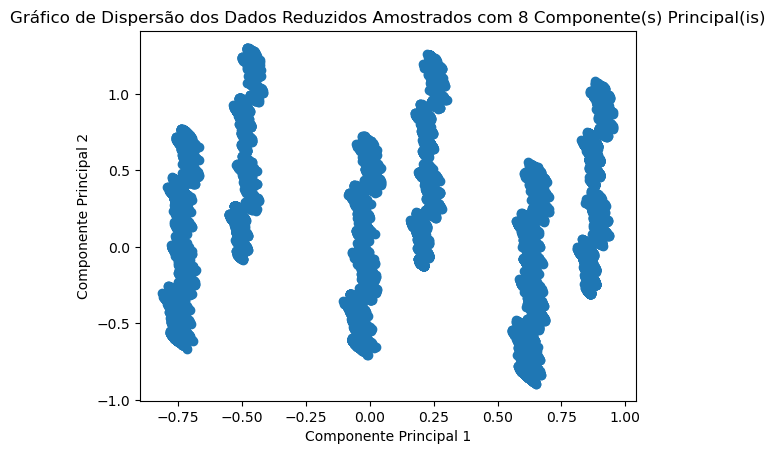

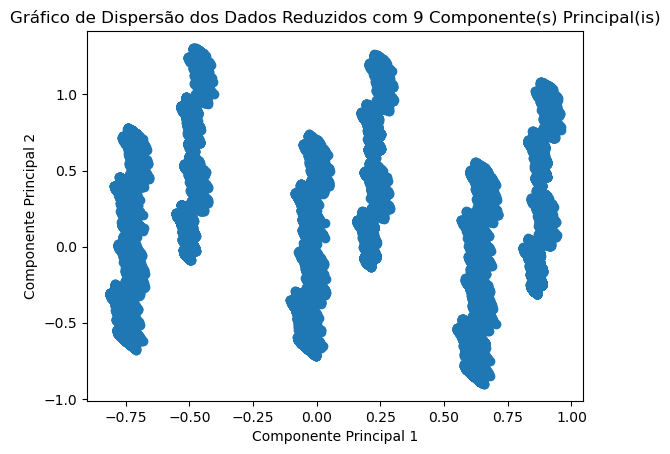

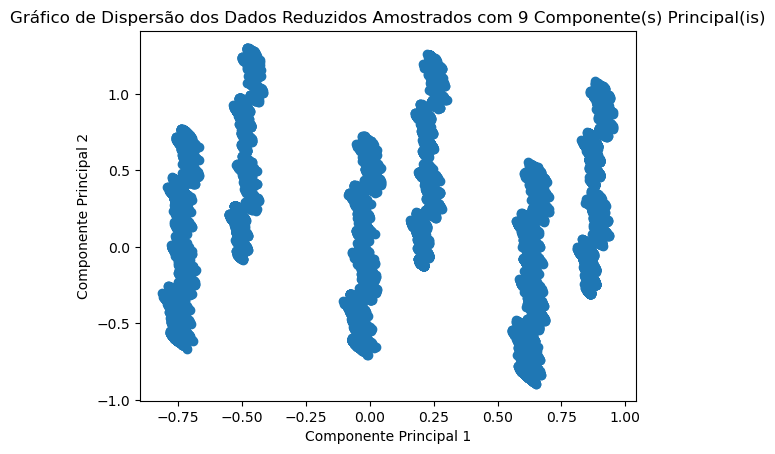

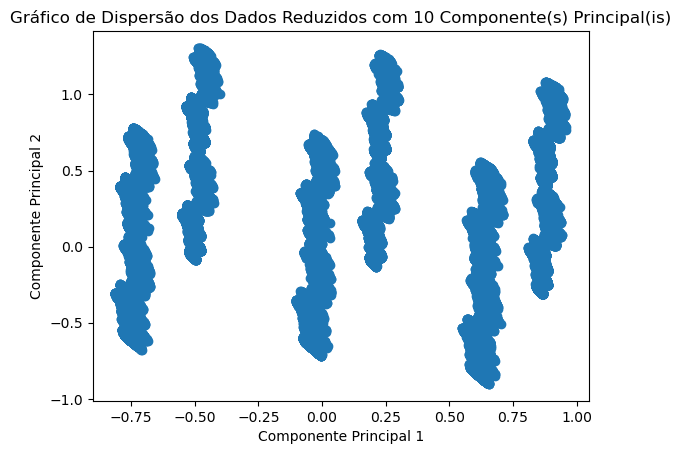

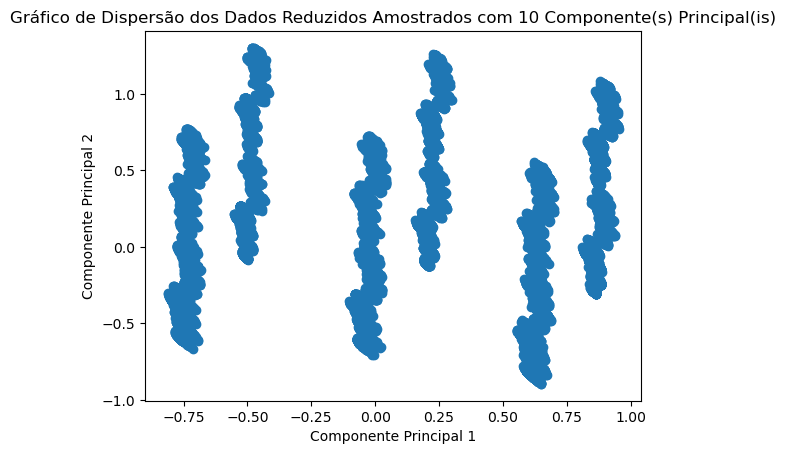

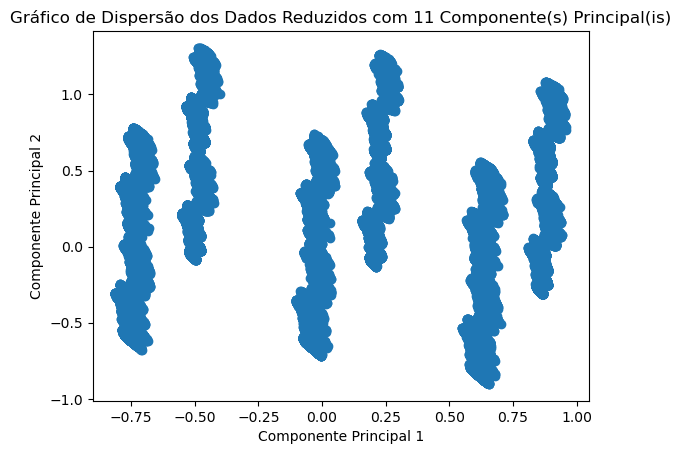

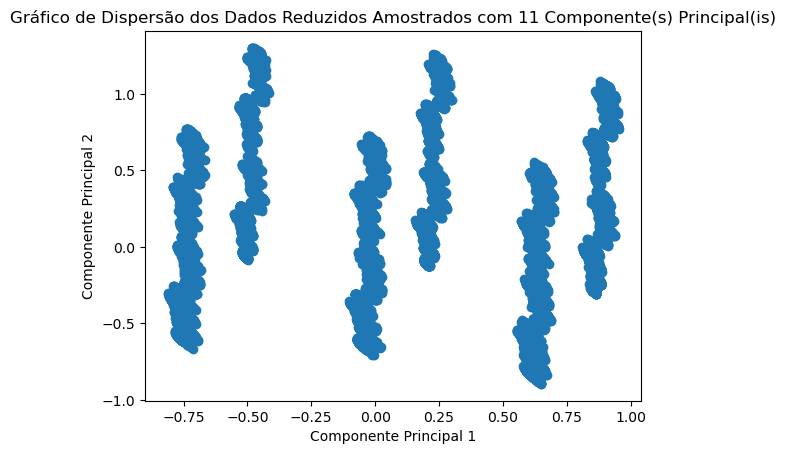

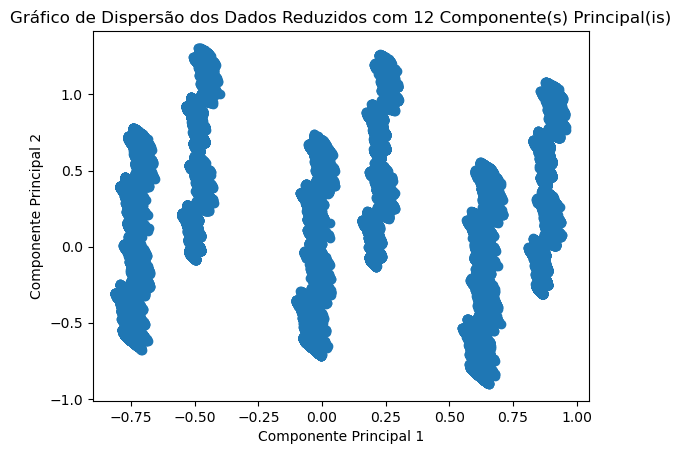

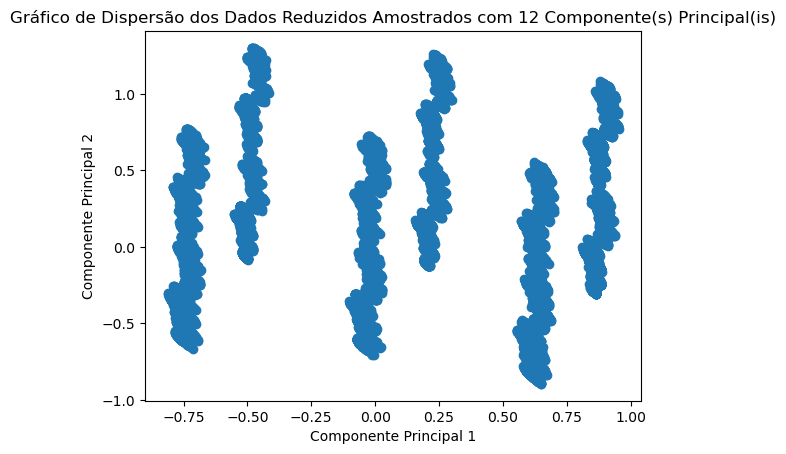

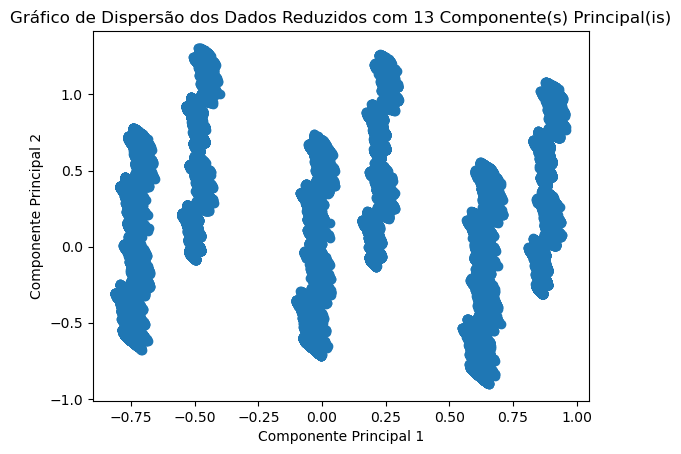

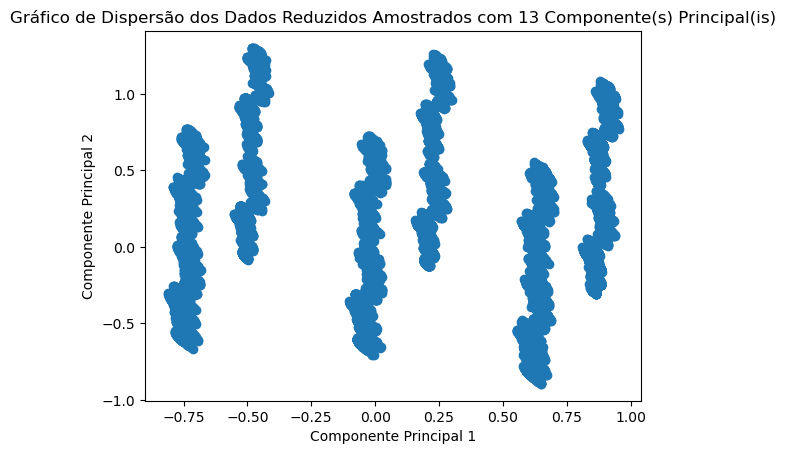

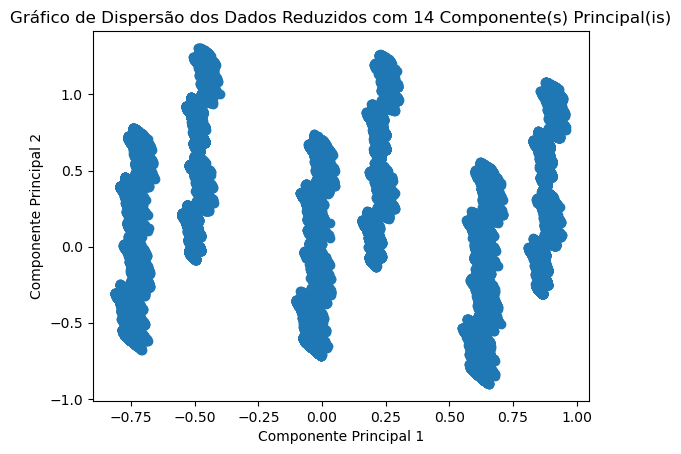

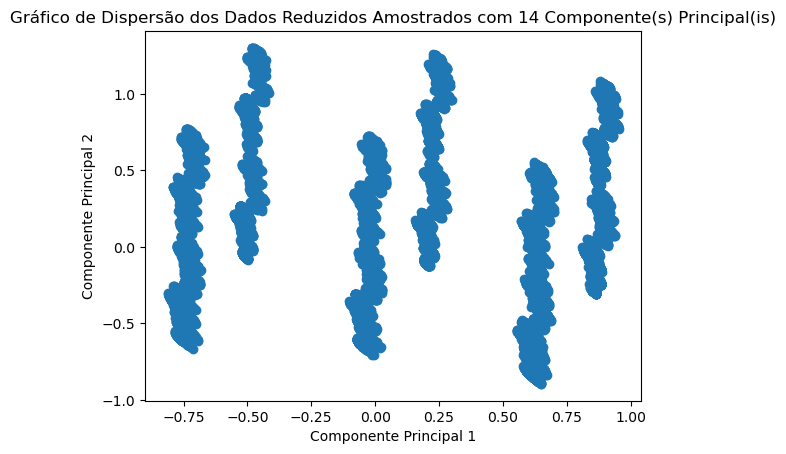

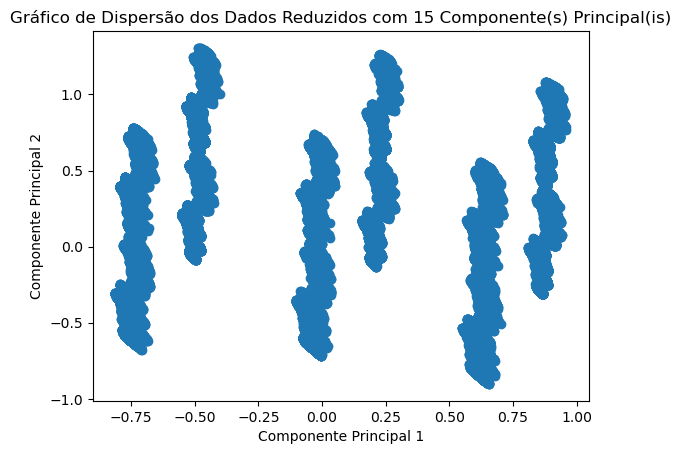

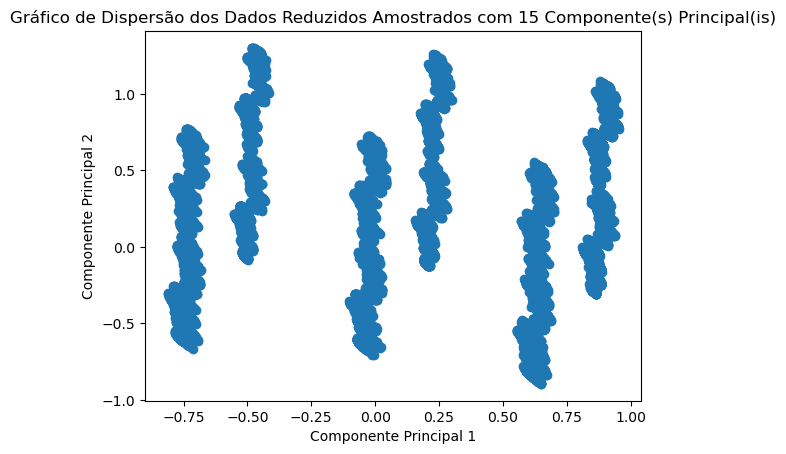

In [38]:
lista = list(range(2, 16))
dados_reduced_dict = {}
for n in lista:
    # Inicializando o objeto PCA com o número de componentes principais desejados
    pca = PCA(n_components=n)

    # Aplicando a transformação PCA aos dados e armazenando o resultado em um DataFrame chamado dados_reduced_02
    dados_reduced_02 = pd.DataFrame(pca.fit_transform(dados_dose_definitivo_01))
     
    # Armazenando os dados reduzidos no dicionário, onde a chave é o valor de n e o valor correspondente é o DataFrame
    dados_reduced_dict[n] = dados_reduced_02
    
    # Plotando um gráfico de dispersão dos dados reduzidos (apenas duas dimensões)
    plt.scatter(dados_reduced_02.iloc[:,0], dados_reduced_02.iloc[:,1])

    # Nomeando os eixos
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Gráfico de Dispersão dos Dados Reduzidos com {} Componente(s) Principal(is)'.format(n))

    # Mostrando o gráfico
    plt.show()

    # Amostrando os dados reduzidos para 75000 instâncias, garantindo que a amostra seja a mesma para diferentes execuções (random_state=42)
    dados_reduced_02_sample = dados_reduced_02.sample(75000, random_state=42)

    # Plotando um gráfico de dispersão dos dados reduzidos amostrados
    plt.scatter(dados_reduced_02_sample.iloc[:,0], dados_reduced_02_sample.iloc[:,1])

    # Nomeando os eixos
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Gráfico de Dispersão dos Dados Reduzidos Amostrados com {} Componente(s) Principal(is)'.format(n))

    # Mostrando o gráfico
    plt.show()



# Formação de Clustering 

KMeans

Gaussian Mixture Models (GMM)

Índice de Silhueta 

BIC

DBI

In [39]:
data_using = dados_reduced_dict[2] 

In [40]:
def generate_clusters(data, n_clusters, method='kmeans'):
    if method == 'kmeans':
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=75000)
        kmeans.fit(data)
        labels = kmeans.labels_
    elif method == 'gmm':
        gmm = GaussianMixture(n_components=n_clusters, random_state=75000)
        gmm.fit(data)
        labels = gmm.predict(data)
    else:
        raise ValueError("Invalid method. Use 'kmeans' or 'gmm'.")
    return labels

In [41]:
def evaluate_clustering_methods(data, min_clusters=4, max_clusters=15):
    performance_results = []
    cluster_labels = {}
    cluster_labels_arr = []  # Lista para armazenar os rótulos dos clusters como arrays
    
    total_iterations = (max_clusters - min_clusters + 1)
    pbar = tqdm(total=total_iterations)
    
    for n_clusters in range(min_clusters, max_clusters + 1):
        pbar.set_description(f'Progress: Clusters = {n_clusters}')
        print("Evaluating with", n_clusters, "clusters")
        
        # KMeans
        print("Calculating KMeans")
        kmeans_labels = generate_clusters(data, n_clusters, method='kmeans')
        cluster_labels[f'KMeans_{n_clusters}'] = kmeans_labels
        cluster_labels_arr.append(kmeans_labels)  # Adiciona o array de rótulos
        
        print("Calculating KMeans BIC")  # Corrigido de 'inertia' para 'bic'
        kmeans_bic = KMeans(n_clusters=n_clusters, n_init=10, random_state=75000).fit(data).inertia_
        kmeans_dbi = davies_bouldin_score(data, kmeans_labels)
        
        # GMM
        print("Calculating GMM")
        gmm_labels = generate_clusters(data, n_clusters, method='gmm')
        cluster_labels[f'GMM_{n_clusters}'] = gmm_labels
        cluster_labels_arr.append(gmm_labels)  # Adiciona o array de rótulos
        
        print("Calculating GMM BIC")
        gmm_bic = GaussianMixture(n_components=n_clusters, random_state=75000).fit(data).bic(data)
        gmm_dbi = davies_bouldin_score(data, gmm_labels)
        
        performance_results.append({
            'Number of Clusters': n_clusters,
            'KMeans (BIC)': kmeans_bic,
            'KMeans (DBI)': kmeans_dbi,
            'GMM (BIC)': gmm_bic,
            'GMM (DBI)': gmm_dbi
        })
        
        pbar.update(1)
    
    pbar.close()

    performance_df = pd.DataFrame(performance_results)
    return performance_df, cluster_labels, cluster_labels_arr

In [42]:
resultado_tupla = evaluate_clustering_methods(data_using)  


Progress: Clusters = 4:   0%|                                                                   | 0/12 [00:00<?, ?it/s]

Evaluating with 4 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 5:   8%|████▉                                                      | 1/12 [01:07<12:27, 67.99s/it]

Evaluating with 5 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 6:  17%|█████████▊                                                 | 2/12 [01:44<08:12, 49.21s/it]

Evaluating with 6 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 7:  25%|██████████████▌                                           | 3/12 [04:33<15:37, 104.20s/it]

Evaluating with 7 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 8:  33%|███████████████████▎                                      | 4/12 [08:11<19:53, 149.18s/it]

Evaluating with 8 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 9:  42%|████████████████████████▏                                 | 5/12 [12:09<21:08, 181.22s/it]

Evaluating with 9 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 10:  50%|████████████████████████████▌                            | 6/12 [15:45<19:17, 192.86s/it]

Evaluating with 10 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 11:  58%|█████████████████████████████████▎                       | 7/12 [19:48<17:26, 209.31s/it]

Evaluating with 11 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 12:  67%|██████████████████████████████████████                   | 8/12 [24:17<15:13, 228.39s/it]

Evaluating with 12 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 13:  75%|██████████████████████████████████████████▊              | 9/12 [27:46<11:06, 222.20s/it]

Evaluating with 13 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 14:  83%|██████████████████████████████████████████████▋         | 10/12 [33:08<08:25, 252.95s/it]

Evaluating with 14 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 15:  92%|███████████████████████████████████████████████████▎    | 11/12 [37:10<04:09, 249.62s/it]

Evaluating with 15 clusters
Calculating KMeans
Calculating KMeans BIC
Calculating GMM
Calculating GMM BIC



Progress: Clusters = 15: 100%|████████████████████████████████████████████████████████| 12/12 [41:02<00:00, 205.19s/it]


In [43]:
Data_Frame_avaliacao = resultado_tupla[0]
clusterings_rotulo = resultado_tupla[1]

In [86]:
Data_Frame_avaliacao

Number of Clusters   KMeans (BIC)  KMeans (DBI)     GMM (BIC)  GMM (DBI)
0                    4  228002.311794      0.767031  3.041364e+06   0.939061
1                    5  175349.931713      0.764013  2.689160e+06   0.856164
2                    6  132422.853596      0.679400 -9.930712e+04   1.410915
3                    7  103449.654243      0.673697 -1.357853e+05   1.313389
4                    8   77681.495392      0.641218 -2.744522e+05   1.210805
5                    9   60450.990987      0.574258  5.445308e+04   1.134005
6                   10   52944.890128      0.597649 -4.785445e+05   1.309552
7                   11   45418.861502      0.631389 -5.777862e+05   1.070026
8                   12   40460.688930      0.617441 -6.698667e+05   1.003908
9                   13   35805.098967      0.636928 -1.822224e+06   0.927771
10                  14   32197.292241      0.628324 -1.803802e+06   0.960324
11                  15   29472.364737      0.671687 -1.865058e+06   0.860722

In [45]:
clusterings_rotulo

{'KMeans_4': array([0, 0, 1, ..., 3, 3, 1]),
 'GMM_4': array([1, 1, 3, ..., 3, 3, 3], dtype=int64),
 'KMeans_5': array([4, 4, 3, ..., 0, 0, 3]),
 'GMM_5': array([2, 2, 3, ..., 0, 0, 3], dtype=int64),
 'KMeans_6': array([0, 0, 3, ..., 4, 4, 3]),
 'GMM_6': array([5, 5, 3, ..., 0, 0, 3], dtype=int64),
 'KMeans_7': array([5, 5, 6, ..., 0, 0, 6]),
 'GMM_7': array([5, 5, 6, ..., 0, 0, 6], dtype=int64),
 'KMeans_8': array([6, 6, 1, ..., 3, 3, 1]),
 'GMM_8': array([6, 6, 3, ..., 0, 0, 3], dtype=int64),
 'KMeans_9': array([2, 2, 1, ..., 3, 3, 1]),
 'GMM_9': array([6, 6, 3, ..., 8, 8, 3], dtype=int64),
 'KMeans_10': array([8, 8, 7, ..., 2, 2, 7]),
 'GMM_10': array([9, 9, 3, ..., 8, 8, 3], dtype=int64),
 'KMeans_11': array([ 0,  0, 10, ...,  1,  1, 10]),
 'GMM_11': array([10, 10,  3, ...,  8,  8,  3], dtype=int64),
 'KMeans_12': array([10, 10,  9, ...,  0,  0,  9]),
 'GMM_12': array([10, 10,  3, ...,  8,  8,  3], dtype=int64),
 'KMeans_13': array([4, 4, 9, ..., 1, 1, 9]),
 'GMM_13': array([10, 10

## Confecção dos gráficos de Clustering 

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kmeans_scatter(data, cluster_labels, n_clusters):
    palette = sns.color_palette('hls', n_clusters)
    plt.figure()
    for cluster in range(n_clusters):
        cluster_data = data[cluster_labels == cluster]
        plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], color=palette[cluster], label=f'Cluster {cluster}')
    plt.title(f'KMeans - {n_clusters} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def plot_gmm_scatter(data, cluster_labels, n_clusters):
    plt.figure()
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
    plt.title(f'GMM - {n_clusters} Components')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

def plot_clusters(clusterings, data):
    for key, cluster_labels in clusterings.items():
        method, n_clusters = key.split('_')
        n_clusters = int(n_clusters)
        if method.startswith('KMeans'):
            plot_kmeans_scatter(data, cluster_labels, n_clusters)
        elif method.startswith('GMM'):
            plot_gmm_scatter(data, cluster_labels, n_clusters)


C:\Users\felipe.lucas\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


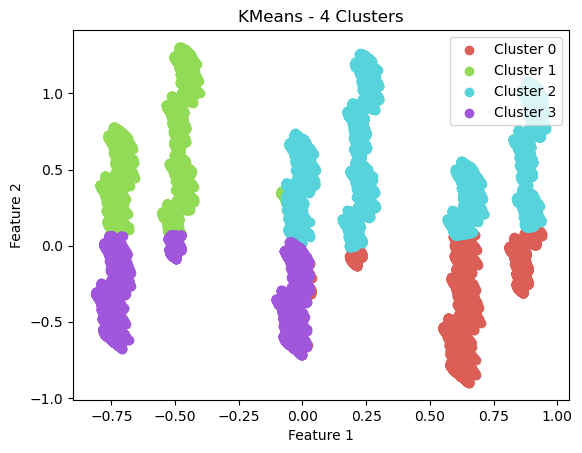

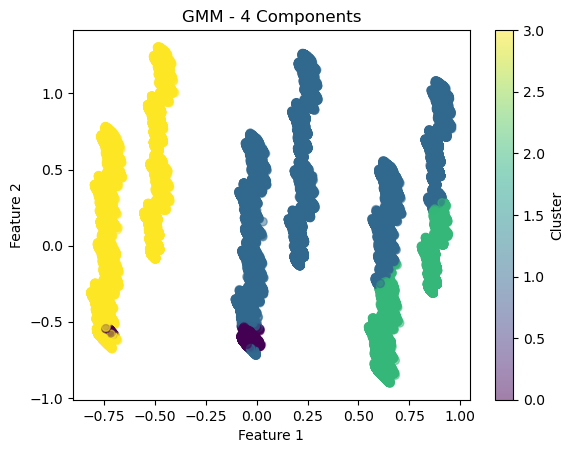

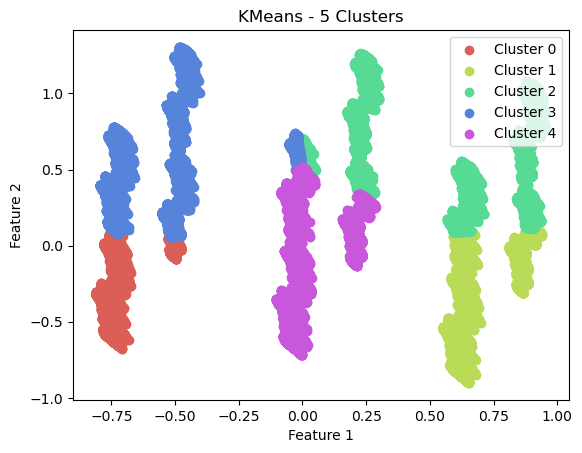

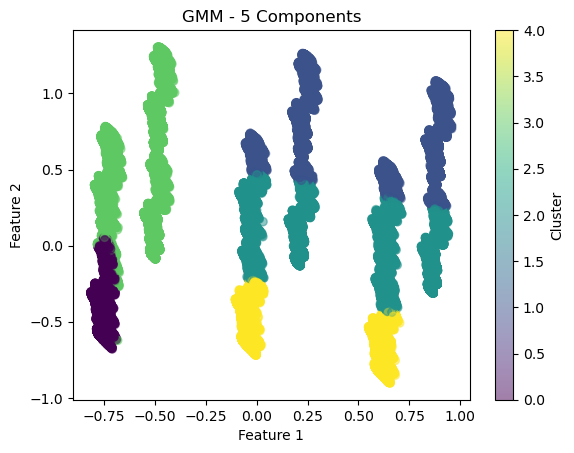

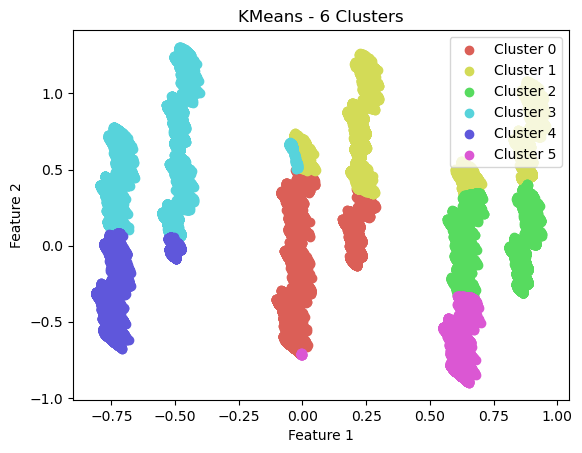

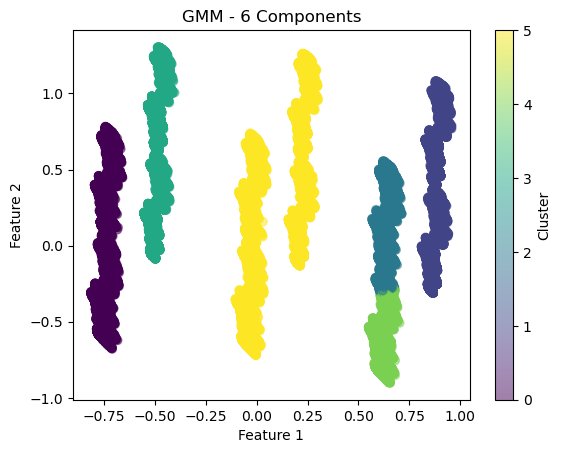

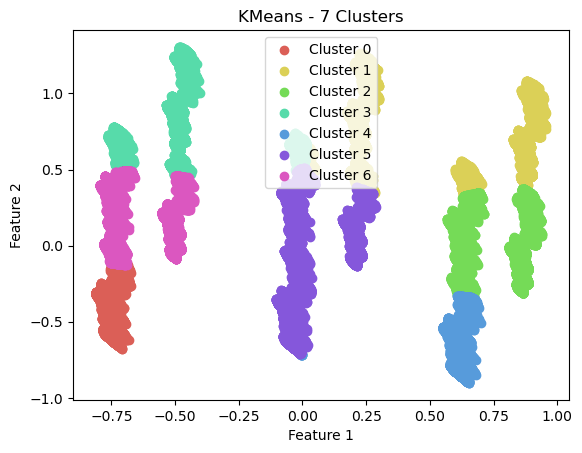

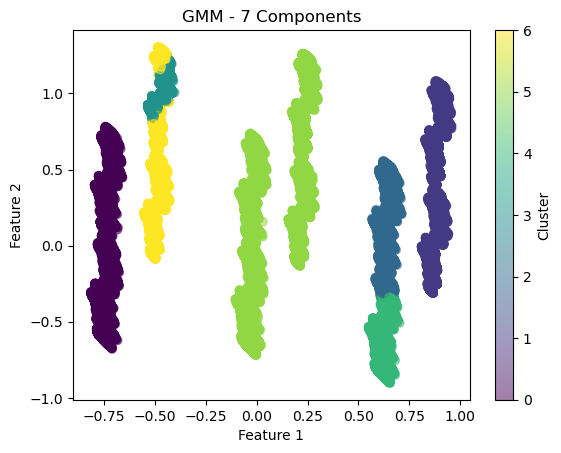

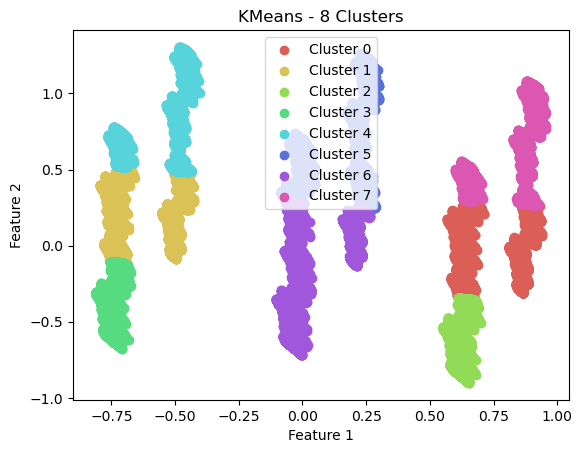

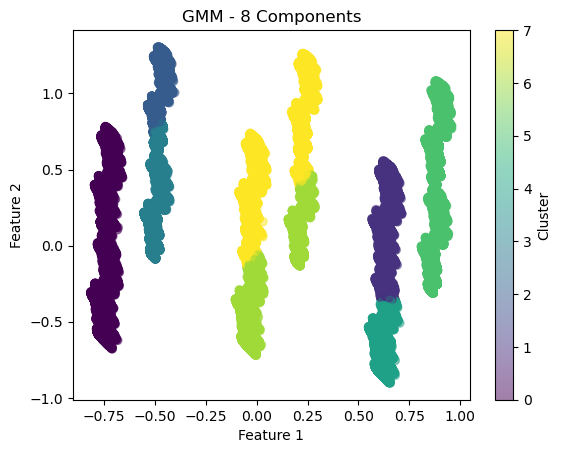

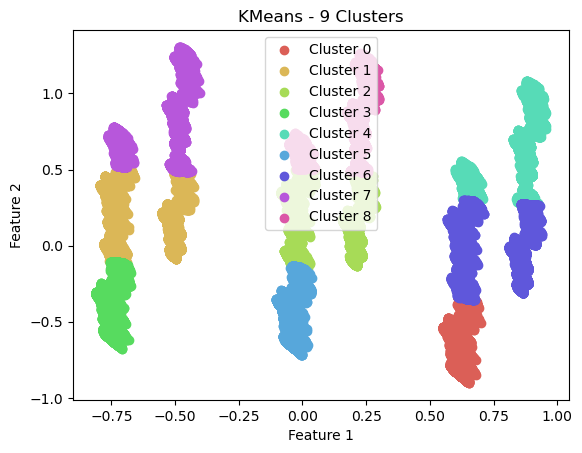

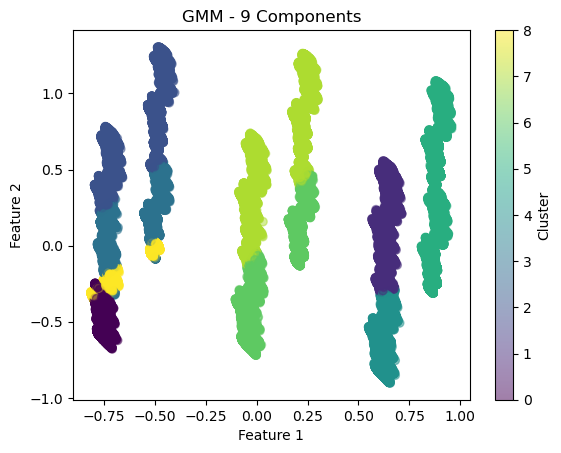

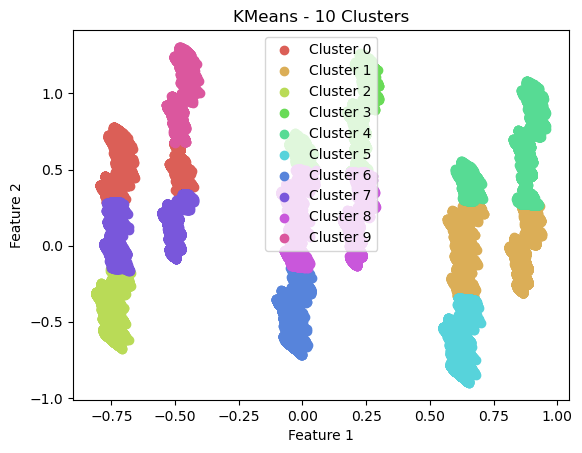

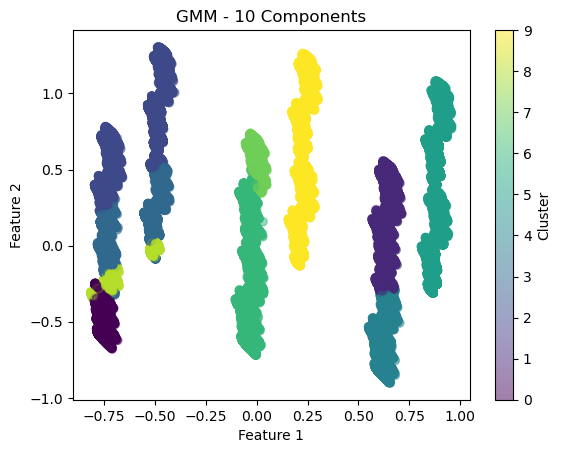

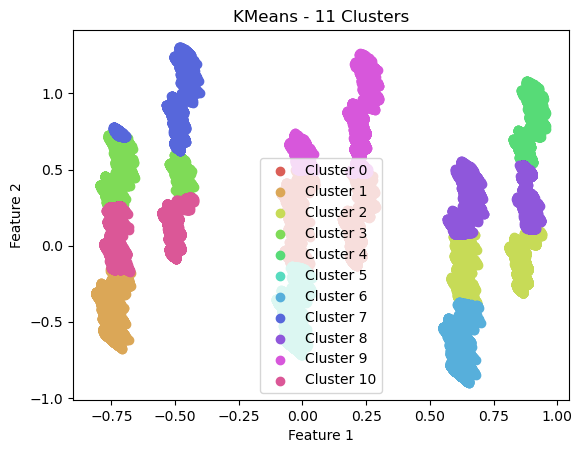

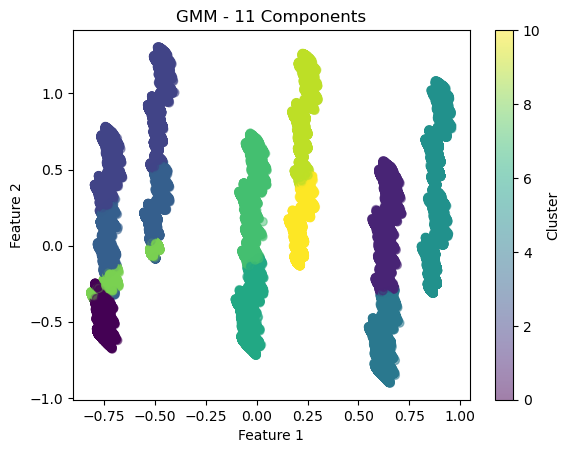

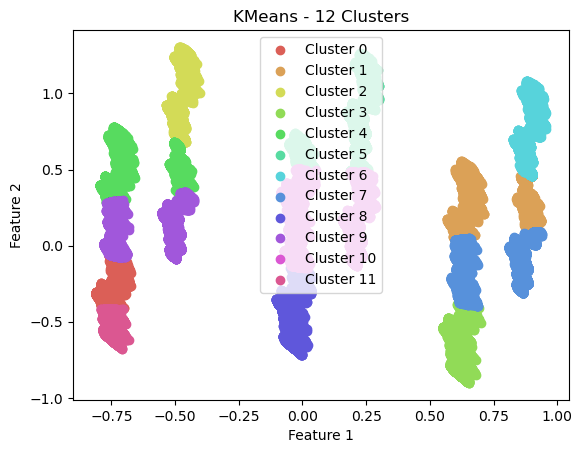

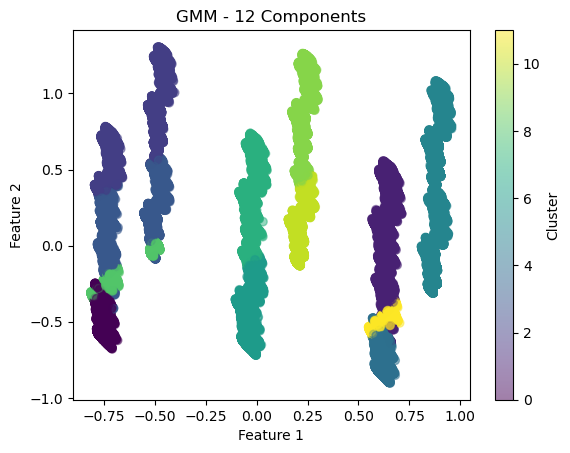

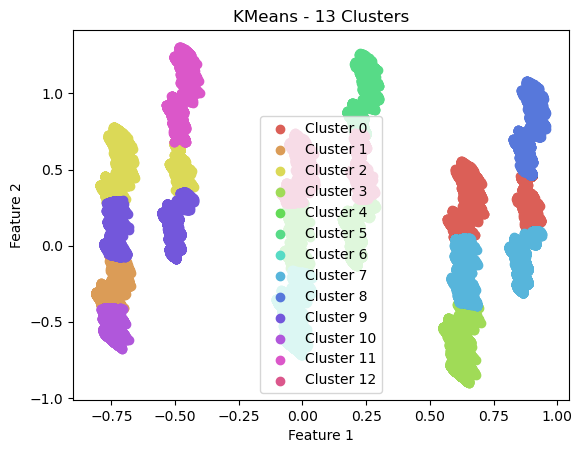

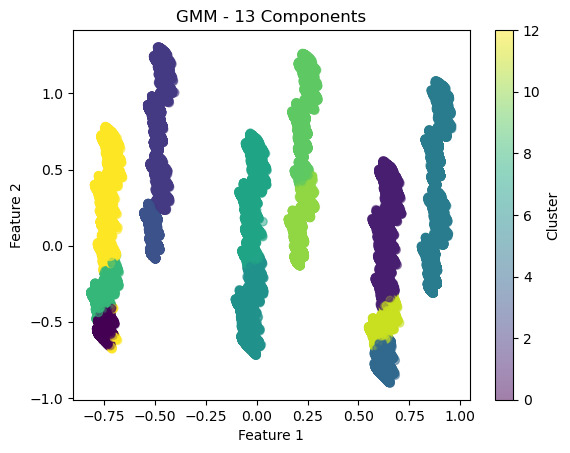

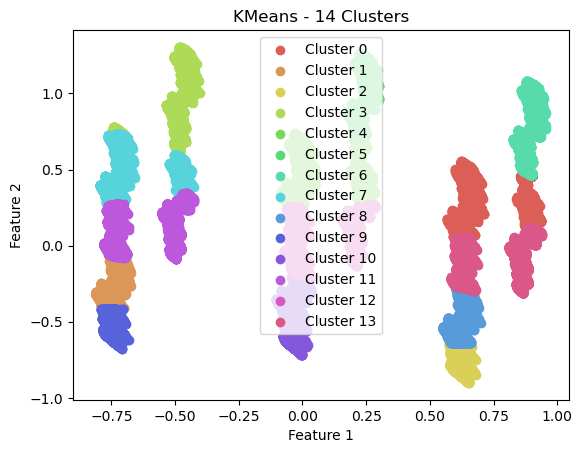

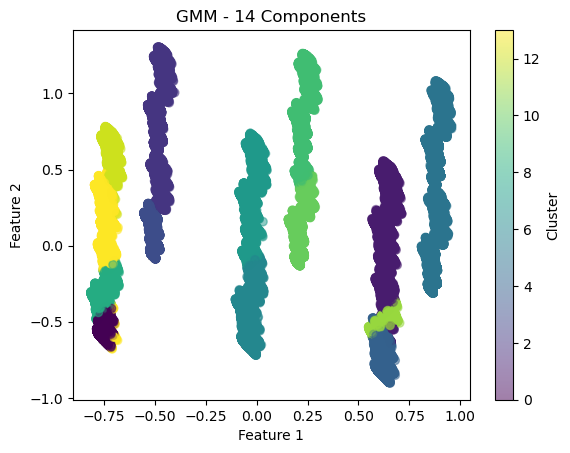

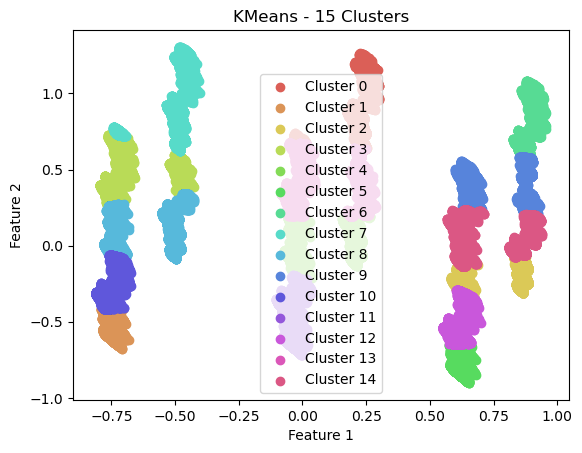

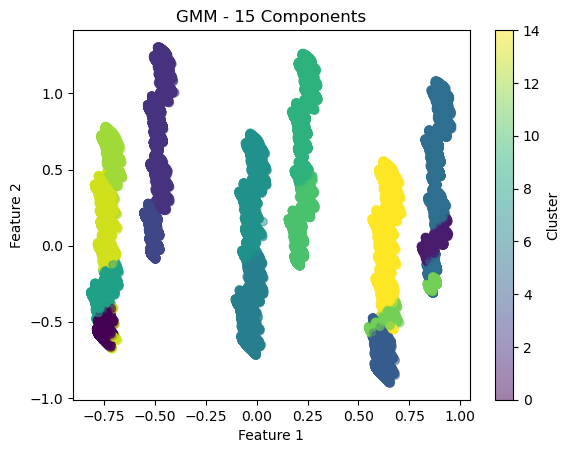

In [47]:
plot_clusters(clusterings_rotulo, data_using)

## Confeccionando gráficos 

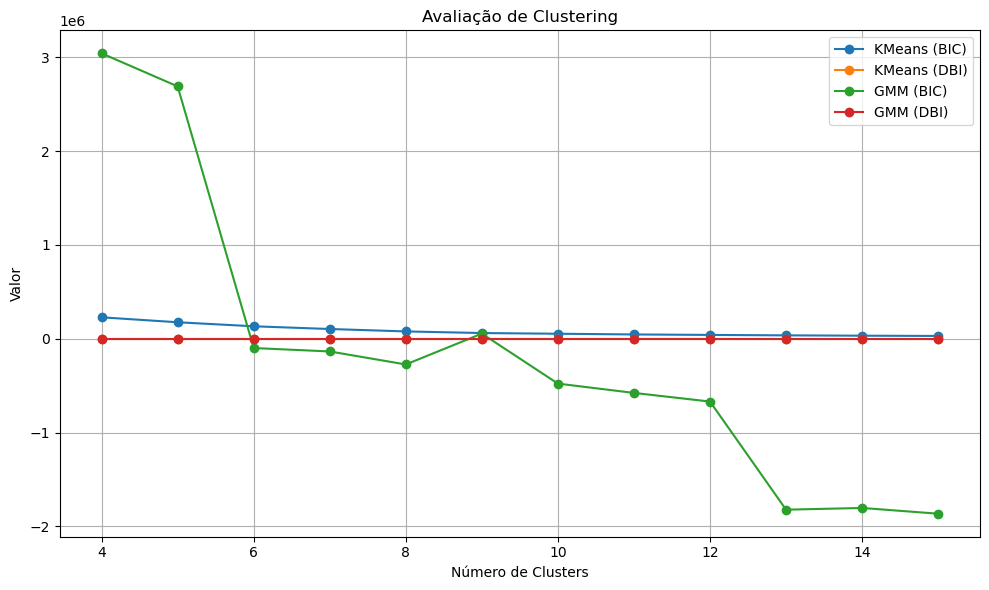

In [48]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotando os dados
plt.plot(Data_Frame_avaliacao['Number of Clusters'], Data_Frame_avaliacao['KMeans (BIC)'], marker='o', label='KMeans (BIC)')
plt.plot(Data_Frame_avaliacao['Number of Clusters'], Data_Frame_avaliacao['KMeans (DBI)'], marker='o', label='KMeans (DBI)')
plt.plot(Data_Frame_avaliacao['Number of Clusters'], Data_Frame_avaliacao['GMM (BIC)'], marker='o', label='GMM (BIC)')
plt.plot(Data_Frame_avaliacao['Number of Clusters'], Data_Frame_avaliacao['GMM (DBI)'], marker='o', label='GMM (DBI)')

# Adicionando título e rótulos dos eixos
plt.title('Avaliação de Clustering')
plt.xlabel('Número de Clusters')
plt.ylabel('Valor')
plt.legend()

# Mostrando o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

## Disposição de clustering 

In [65]:
def add_cluster_labels(original_df, cluster_labels):
    cluster_method = input("Digite 'KMeans' ou 'GMM' para escolher o método de clustering: ")
    
    # Validar a entrada do usuário
    while cluster_method not in ['KMeans', 'GMM']:
        print("Opção inválida! Por favor, digite 'KMeans' ou 'GMM'.")
        cluster_method = input("Digite 'KMeans' ou 'GMM' para escolher o método de clustering: ")
    
    num_clusters = int(input("Digite o número desejado de clusters: "))
    
    cluster_labels_selected = cluster_labels[f'{cluster_method}_{num_clusters}']
    
    original_df_with_clusters = original_df.copy()  # Para não modificar o DataFrame original
    original_df_with_clusters['Cluster_Labels_with_semantics'] = cluster_labels_selected
    
    return original_df_with_clusters

dados_dose_definitivo_01_com_clusters = add_cluster_labels(dados_dose_definitivo_01, clusterings_rotulo)

Digite 'KMeans' ou 'GMM' para escolher o método de clustering: GMM
Digite o número desejado de clusters: 6


In [66]:
dados_dose_definitivo_01_com_clusters


DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  DOID:0110741  \
0        0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1        0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
2        0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
3        0.135413   0.109892    1.000000  0.109892   0.093360      0.069899   
4        0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
...           ...        ...         ...       ...        ...           ...   
1671974  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
1671975  1.000000   0.109892    0.135413  0.266882   0.226732      0.069899   
1671976  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1671977  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1671978  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   

         DOID:3230  DOID:850  DOID:417  DOID:557  ...  IS_CAPITAL  UTI  White  \
0         0.000000  0.000000  0.000000  0.000000  ...           1    0      0   
1         0.000000  0.000000  0.000000  0.000000  ...           1    0      0   
2         0.049858  0.049858  0.069899  0.069899  ...           1    0      1   
3         0.109892  0.109892  0.135413  0.135413  ...           1    1      1   
4         0.049858  0.049858  0.069899  0.069899  ...           1    1      1   
...            ...       ...       ...       ...  ...         ...  ...    ...   
1671974   0.049858  0.049858  0.069899  0.069899  ...           1    1      0   
1671975   0.266882  0.266882  0.328859  0.328859  ...           1    0      1   
1671976   0.000000  0.000000  0.000000  0.000000  ...           0    0      1   
1671977   0.000000  0.000000  0.000000  0.000000  ...           0    0      1   
1671978   0.049858  0.049858  0.069899  0.069899  ...           1    0      1   

         Black/Brown  Asian  Indigenous  IDH_MUM_RES  IDH_MU_INTE  mesmo_mun  \
0                  0      0           0     0.871622     0.871622          1   
1                  0      0           0     0.871622     0.871622          1   
2                  0      0           0     0.871622     0.871622          1   
3                  0      0           0     0.871622     0.871622          1   
4                  0      0           0     0.871622     0.871622          1   
...              ...    ...         ...          ...          ...        ...   
1671974            0      0           0     0.871622     0.871622          1   
1671975            0      0           0     0.871622     0.871622          1   
1671976            0      0           0     0.871622     0.779259          0   
1671977            0      0           0     0.639640     0.810811          0   
1671978            0      0           0     0.871622     0.871622          1   

         Cluster_Labels_with_semantics  
0                                    5  
1                                    5  
2                                    3  
3                                    3  
4                                    3  
...                                ...  
1671974                              5  
1671975                              3  
1671976                              0  
1671977                              0  
1671978                              3  

[1671979 rows x 23 columns]

In [67]:
def add_cluster_labels(original_df, cluster_labels):
    cluster_key = input("Digite a chave do dicionário de rótulos de cluster (por exemplo, 'GMM_8'): ")

    if cluster_key not in cluster_labels:
        print(f"Os resultados para a chave {cluster_key} não estão disponíveis.")
        return original_df

    cluster_labels_selected = cluster_labels[cluster_key]
    original_df_with_clusters = original_df.copy()
    original_df_with_clusters['Cluster_Labels_without_semantics'] = cluster_labels_selected

    return original_df_with_clusters


In [68]:
dados_dose_definitivo_01_com_e_sem_clusters = add_cluster_labels(dados_dose_definitivo_01_com_clusters, clusterings_rotulo_inicial)

Digite a chave do dicionário de rótulos de cluster (por exemplo, 'GMM_8'): GMM_8


In [69]:
dados_dose_definitivo_01_com_e_sem_clusters


DOID:114  DOID:2531  DOID:14250  DOID:409  DOID:2841  DOID:0110741  \
0        0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1        0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
2        0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
3        0.135413   0.109892    1.000000  0.109892   0.093360      0.069899   
4        0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
...           ...        ...         ...       ...        ...           ...   
1671974  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   
1671975  1.000000   0.109892    0.135413  0.266882   0.226732      0.069899   
1671976  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1671977  0.000000   0.000000    0.000000  0.000000   0.000000      0.000000   
1671978  0.069899   0.049858    0.069899  0.049858   0.036762      1.000000   

         DOID:3230  DOID:850  DOID:417  DOID:557  ...  UTI  White  \
0         0.000000  0.000000  0.000000  0.000000  ...    0      0   
1         0.000000  0.000000  0.000000  0.000000  ...    0      0   
2         0.049858  0.049858  0.069899  0.069899  ...    0      1   
3         0.109892  0.109892  0.135413  0.135413  ...    1      1   
4         0.049858  0.049858  0.069899  0.069899  ...    1      1   
...            ...       ...       ...       ...  ...  ...    ...   
1671974   0.049858  0.049858  0.069899  0.069899  ...    1      0   
1671975   0.266882  0.266882  0.328859  0.328859  ...    0      1   
1671976   0.000000  0.000000  0.000000  0.000000  ...    0      1   
1671977   0.000000  0.000000  0.000000  0.000000  ...    0      1   
1671978   0.049858  0.049858  0.069899  0.069899  ...    0      1   

         Black/Brown  Asian  Indigenous  IDH_MUM_RES  IDH_MU_INTE  mesmo_mun  \
0                  0      0           0     0.871622     0.871622          1   
1                  0      0           0     0.871622     0.871622          1   
2                  0      0           0     0.871622     0.871622          1   
3                  0      0           0     0.871622     0.871622          1   
4                  0      0           0     0.871622     0.871622          1   
...              ...    ...         ...          ...          ...        ...   
1671974            0      0           0     0.871622     0.871622          1   
1671975            0      0           0     0.871622     0.871622          1   
1671976            0      0           0     0.871622     0.779259          0   
1671977            0      0           0     0.639640     0.810811          0   
1671978            0      0           0     0.871622     0.871622          1   

         Cluster_Labels_with_semantics  Cluster_Labels_without_semantics  
0                                    5                                 5  
1                                    5                                 5  
2                                    3                                 3  
3                                    3                                 3  
4                                    3                                 3  
...                                ...                               ...  
1671974                              5                                 7  
1671975                              3                                 3  
1671976                              0                                 0  
1671977                              0                                 0  
1671978                              3                                 3  

[1671979 rows x 24 columns]

In [70]:
dados_dose_definitivo_01_com_e_sem_clusters.columns

Index(['DOID:114', 'DOID:2531', 'DOID:14250', 'DOID:409', 'DOID:2841',
       'DOID:0110741', 'DOID:3230', 'DOID:850', 'DOID:417', 'DOID:557',
       'DOID:9970', 'CS_SEXO', 'NU_IDADE_N', 'IS_CAPITAL', 'UTI', 'White',
       'Black/Brown', 'Asian', 'Indigenous', 'IDH_MUM_RES', 'IDH_MU_INTE',
       'mesmo_mun', 'Cluster_Labels_with_semantics',
       'Cluster_Labels_without_semantics'],
      dtype='object')

## Algoritmo para a predição de mortes

In [76]:
# Faz uma cópia de df1
srag_tratado_teste = srag_tratado.copy()

# Integra as colunas 'Idade' e 'Cidade' de df2 na cópia de df1 com base na coluna 'ID'
srag_tratado_teste['Cluster_Labels_with_semantics'] = dados_dose_definitivo_01_com_e_sem_clusters['Cluster_Labels_with_semantics']
srag_tratado_teste['Cluster_Labels_without_semantics'] = dados_dose_definitivo_01_com_e_sem_clusters['Cluster_Labels_without_semantics']

              ID  CS_SEXO  NU_IDADE_N  CARDIOPATI_m  HEMATOLOGI_m  \
0              1        1    0.373737             0             0   
1              2        0    0.414141             0             0   
2              3        0    0.727273             1             0   
3              4        1    0.404040             0             0   
4              5        0    0.343434             1             0   
...          ...      ...         ...           ...           ...   
1671974  2083081        1    0.484848             1             0   
1671975  2084652        1    0.474747             1             0   
1671976  2084837        0    0.434343             0             0   
1671977  2085468        1    0.131313             0             0   
1671978  2085681        1    0.454545             1             0   

         SIND_DOWN_m  HEPATICA_m  ASMA_m  DIABETES_m  NEUROLOGIC_m  ...  \
0                  0           0       0           0             0  ...   
1                  0 

In [77]:
srag_tratado_teste.columns

Index(['ID', 'CS_SEXO', 'NU_IDADE_N', 'CARDIOPATI_m', 'HEMATOLOGI_m',
       'SIND_DOWN_m', 'HEPATICA_m', 'ASMA_m', 'DIABETES_m', 'NEUROLOGIC_m',
       'PNEUMOPATI_m', 'IMUNODEPRE_m', 'RENAL_m', 'OBESIDADE_m', 'IS_CAPITAL',
       'UTI', 'IS_DEATH', 'White', 'Black/Brown', 'Asian', 'Indigenous',
       'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun',
       'Cluster_Labels_with_semantics', 'Cluster_Labels_without_semantics'],
      dtype='object')

#### Sem semântica 

In [81]:
# Selecionando as features relevantes
features_01 = ['ID', 'CS_SEXO', 'NU_IDADE_N', 'CARDIOPATI_m', 'HEMATOLOGI_m',
       'SIND_DOWN_m', 'HEPATICA_m', 'ASMA_m', 'DIABETES_m', 'NEUROLOGIC_m',
       'PNEUMOPATI_m', 'IMUNODEPRE_m', 'RENAL_m', 'OBESIDADE_m', 'IS_CAPITAL',
       'UTI', 'White', 'Black/Brown', 'Asian', 'Indigenous',
       'IDH_MUM_RES', 'IDH_MU_INTE', 'mesmo_mun',
       'Cluster_Labels_with_semantics', 'Cluster_Labels_without_semantics']  # Defina as características relevantes

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(srag_tratado_teste[features_01], srag_tratado['IS_DEATH'], test_size=0.2, random_state=42)

# Treinando o modelo XGBoost
model_01 = XGBClassifier()
model_01.fit(X_train, y_train)

# Fazendo previsões
predictions_01 = model_01.predict(X_test)

# Avaliando o desempenho do modelo
print(classification_report(y_test, predictions_01))



              precision    recall  f1-score   support

           0       0.87      0.90      0.88    222089
           1       0.79      0.74      0.76    112307

    accuracy                           0.84    334396
   macro avg       0.83      0.82      0.82    334396
weighted avg       0.84      0.84      0.84    334396



In [82]:
importance = model_01.feature_importances_
feature_importance = dict(zip(features_01, importance))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Importância das características nas previsões de morte:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Importância das características nas previsões de morte:
UTI: 0.1980011761188507
White: 0.17639099061489105
Cluster_Labels_without_semantics: 0.12163900583982468
DIABETES_m: 0.11141442507505417
CARDIOPATI_m: 0.09971343725919724
Black/Brown: 0.09104371070861816
NU_IDADE_N: 0.055836040526628494
Cluster_Labels_with_semantics: 0.02091454155743122
OBESIDADE_m: 0.015608529560267925
mesmo_mun: 0.015515925362706184
CS_SEXO: 0.013309205882251263
RENAL_m: 0.012675439938902855
IMUNODEPRE_m: 0.012183789163827896
HEPATICA_m: 0.008956409059464931
NEUROLOGIC_m: 0.008692890405654907
IS_CAPITAL: 0.007422111462801695
IDH_MU_INTE: 0.007255116011947393
PNEUMOPATI_m: 0.006663688458502293
SIND_DOWN_m: 0.004086918197572231
Indigenous: 0.00283401389606297
ID: 0.0025199686642736197
IDH_MUM_RES: 0.002405004110187292
HEMATOLOGI_m: 0.002259276807308197
Asian: 0.0014197976561263204
ASMA_m: 0.0012386420276015997


#### Com semântica

In [84]:
# Selecionando as features relevantes
features_02 = ['DOID:114', 'DOID:2531', 'DOID:14250', 'DOID:409', 'DOID:2841',
       'DOID:0110741', 'DOID:3230', 'DOID:850', 'DOID:417', 'DOID:557',
       'DOID:9970', 'CS_SEXO', 'NU_IDADE_N', 'IS_CAPITAL', 'UTI', 'White',
       'Black/Brown', 'Asian', 'Indigenous', 'IDH_MUM_RES', 'IDH_MU_INTE',
       'mesmo_mun', 'Cluster_Labels_with_semantics',
       'Cluster_Labels_without_semantics']  # Defina as características relevantes

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dados_dose_definitivo_01_com_e_sem_clusters[features_02], srag_tratado['IS_DEATH'], test_size=0.2, random_state=42)

# Treinando o modelo XGBoost
model_02 = XGBClassifier()
model_02.fit(X_train, y_train)

# Fazendo previsões
predictions_02 = model_02.predict(X_test)

# Avaliando o desempenho do modelo
print(classification_report(y_test, predictions_02))



              precision    recall  f1-score   support

           0       0.86      0.89      0.88    222089
           1       0.77      0.72      0.75    112307

    accuracy                           0.84    334396
   macro avg       0.82      0.81      0.81    334396
weighted avg       0.83      0.84      0.83    334396



In [85]:
importance = model_02.feature_importances_
feature_importance = dict(zip(features_02, importance))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Importância das características nas previsões de morte:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Importância das características nas previsões de morte:
UTI: 0.20726227760314941
DOID:114: 0.1652456372976303
White: 0.16060790419578552
Cluster_Labels_without_semantics: 0.1338275521993637
Black/Brown: 0.08824074268341064
DOID:2841: 0.06337417662143707
NU_IDADE_N: 0.05140572786331177
DOID:417: 0.02578973025083542
Cluster_Labels_with_semantics: 0.022806227207183838
mesmo_mun: 0.015191014856100082
DOID:0110741: 0.012569115497171879
CS_SEXO: 0.012021251022815704
DOID:14250: 0.010546180419623852
IS_CAPITAL: 0.00951866153627634
IDH_MU_INTE: 0.007766128983348608
DOID:409: 0.003351240186020732
DOID:3230: 0.0025703092105686665
IDH_MUM_RES: 0.002383456565439701
DOID:2531: 0.0023832335136830807
Indigenous: 0.0015344436978921294
Asian: 0.0014890838647261262
DOID:557: 0.00011601811274886131
DOID:850: 0.0
DOID:9970: 0.0
